# **Modelo de Prediccion de redes nuronales del resultado de los partidos de la seleccion peruana de futbol bajo la direccion de Ricardo Gareka - dire Ciencia de Datos 1**

**Integrantes:**
* Bravo Yataco Luiggi Mariano
* Llamoca León Israel
* Poma Gómez Diego Alonso
* Torres Rua Daniel Isaias

### **Contexto**

Luego de un exhaustivo proceso de recopilación de datos, se ha creado una base de datos lista para usar que contiene los resultados de todos los partidos jugados por la selección nacional de fútbol del Perú, junto con detalles importantes para el análisis. Este proyecto nació de una pasión personal por las estadísticas del fútbol, con la intención inicial de generar gráficos y resúmenes para compartir con amigos. Ahora, el propósito es poner esta información a disposición de la comunidad de Kaggle.

Contenido del dataset:

El archivo principal peru_match_results.csv recopila los resultados de todos los partidos disputados por la selección peruana desde su primer encuentro oficial contra Uruguay el 1 de noviembre de 1927, hasta el partido más reciente registrado al momento de la última actualización.

Se incluyen tanto partidos oficiales como amistosos.

Existen tres partidos excluidos por motivos específicos (ver sección Not considered matches para más detalles).

## **Librerias**:

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import display
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline


# **1. Descripción del conjunto de datos**

Fuente: https://www.kaggle.com/datasets/arturoarias12/peruvian-national-football-team-results?resource=download



### **Variables**


* **match_id:** Comenzando con M seguido del número de coincidencia en orden cronológico.
* **date:** Fecha del partido.
* **rival:** Nombre del equipo contra el que jugó Perú.
* **rival_confederation:** Confederación donde pertenece el rival.
* **peru_score:** Goles marcados por Perú en el partido.
* **rival_score:** Goles recibidos por Perú en el partido.
* **peru_awarded_score:** Goles marcados por Perú luego de revisiones o sanciones (si las hubiera).
* **rival_awarded_score:** Goles recibidos por Perú luego de revisiones o sanciones (si las hubiera).
* **result:** Resultado del partido (G: victoria, D: empate, L: derrota).
* **shootout_result:** Resultado de la tanda de penaltis (si aplica).
* **awarded_result:** Resultado del partido después de revisiones o sanciones (si las hubiera).
* **tournament_name:** Nombre específico del torneo (por ejemplo: Copa Mundial de la FIFA 2018).
* **tournament_type:** Tipo de torneo (p. ej.: Copa Mundial de la FIFA).
* **official:** Booleano que indica si el partido fue oficial.
* **stadium:** Nombre del estadio donde se jugó el partido.
* **city:** Ciudad donde se jugó el partido.
* **country:** País donde se jugó el partido.
* **elevation:** Elevación (sobre el nivel del mar) de la ciudad donde se jugó el partido.
* **peru_condition:** Indica si Perú jugó como equipo local, visitante o neutral.
* **coach:** Nombre del entrenador de la selección peruana al momento del partido.
* **coach_nationality:** Nacionalidad del entrenador.

In [98]:
df = pd.read_csv('peru_match_results.csv')
df.head()

,match_id,rival,rival_confederation,peru_score,rival_score,peru_awarded_score,rival_awarded_score,result,shootout_result,awarded_result,...,tournament_type,official,stadium,city,country,elevation,peru_condition,coach,coach_nationality,date
0,M0001,Uruguay,CONMEBOL,0,4,0,4,L,NaN,L,...,Copa América/Sudamericano,True,Estadio Nacional de Perú,Lima,Peru,154,home,Pedro Olivieri,Uruguay,1927-11-01
1,M0002,Bolivia,CONMEBOL,3,2,3,2,W,NaN,W,...,Copa América/Sudamericano,True,Estadio Nacional de Perú,Lima,Peru,154,home,Pedro Olivieri,Uruguay,1927-11-13
2,M0003,Argentina,CONMEBOL,1,5,1,5,L,NaN,L,...,Copa América/Sudamericano,True,Estadio Nacional de Perú,Lima,Peru,154,home,Pedro Olivieri,Uruguay,1927-11-27
3,M0004,Argentina,CONMEBOL,0,3,0,3,L,NaN,L,...,Copa América/Sudamericano,True,Estadio Viejo Gasómetro,Buenos Aires,Argentina,25,away,Julio Borrelli,Uruguay,1929-11-03
4,M0005,Uruguay,CONMEBOL,1,4,1,4,L,NaN,L,...,Copa América/Sudamericano,True,Estadio Alvear y Tagle,Buenos Aires,Argentina,25,neutral,Julio Borrelli,Uruguay,1929-11-11


In [99]:
df.drop('match_id', axis=1, inplace=True)


In [100]:
df.rename(columns={"rival_confederation":"confederacion_rival","peru_score":"puntuacion_peru","rival_score":"puntuacion_rival","peru_awarded_score":"goles_peru","rival_awarded_score":"goles_rival","result":"resultado","shootout_result":"resultado_penales","awarded_result":"resultado_final_oficial","tournament_name":"nombre_torneo","tournament_type":"tipo_torneo","official":"partido_oficial","stadium":"nombre_estadio","city":"ciudad","country":"pais","elevation":"altitud_sede","peru_condition":"localia_peru","coach":"entrenador","coach_nationality	":"nacionalidad_entrenador","date":"fecha"}, inplace=True)

In [101]:
df.columns.to_list()

['rival',
 'confederacion_rival',
 'puntuacion_peru',
 'puntuacion_rival',
 'goles_peru',
 'goles_rival',
 'resultado',
 'resultado_penales',
 'resultado_final_oficial',
 'nombre_torneo',
 'tipo_torneo',
 'partido_oficial',
 'nombre_estadio',
 'ciudad',
 'pais',
 'altitud_sede',
 'localia_peru',
 'entrenador',
 'coach_nationality',
 'fecha']

* **Naturaleza de las columnas**

In [102]:
df.dtypes

,0
rival,object
confederacion_rival,object
puntuacion_peru,int64
puntuacion_rival,int64
goles_peru,int64
goles_rival,int64
resultado,object
resultado_penales,object
resultado_final_oficial,object
nombre_torneo,object


* **Número de filas**

In [103]:
df.shape[0]

695

* **Número de columnas**

In [104]:
df.shape[1]

20

* **Seleccionando una Muestra**

In [105]:
df= df[df['entrenador'] == 'Ricardo Gareca']  # Filtro correcto
print(df['entrenador'].value_counts(normalize=True) * 100)

entrenador
Ricardo Gareca    100.0
Name: proportion, dtype: float64


In [106]:
print(df['entrenador'].unique())

['Ricardo Gareca']


In [107]:
df.shape[0]

96

* **Análisis de valores faltantes**

In [108]:
print("\nValores faltantes por columna:")
missing_values_summary = df.isna().sum()
print(missing_values_summary)
df_isna_sum_after_drop = missing_values_summary.to_string()


Valores faltantes por columna:
rival                       0
confederacion_rival         0
puntuacion_peru             0
puntuacion_rival            0
goles_peru                  0
goles_rival                 0
resultado                   0
resultado_penales          92
resultado_final_oficial     0
nombre_torneo              31
tipo_torneo                31
partido_oficial             0
nombre_estadio              0
ciudad                      0
pais                        0
altitud_sede                0
localia_peru                0
entrenador                  0
coach_nationality           0
fecha                       0
dtype: int64


* **Eliminando variables con valores faltantes (+15%)**

---



In [109]:
df.drop(['resultado_penales', 'nombre_torneo','tipo_torneo'], axis=1, inplace=True)


In [14]:
print("\nValores faltantes por columna:")
df.isna().sum()


Valores faltantes por columna:


,0
rival,0
confederacion_rival,0
puntuacion_peru,0
puntuacion_rival,0
goles_peru,0
goles_rival,0
resultado,0
resultado_final_oficial,0
partido_oficial,0
nombre_estadio,0


* **Selección de Variables**

In [110]:
df.drop(['goles_peru','goles_rival','puntuacion_peru','puntuacion_rival','resultado_final_oficial','nombre_estadio','ciudad','pais','entrenador','coach_nationality','fecha'], axis=1, inplace=True)

# **2. Análisis Exploratorio de Datos (EDA)**

* **Distribución de resultados**

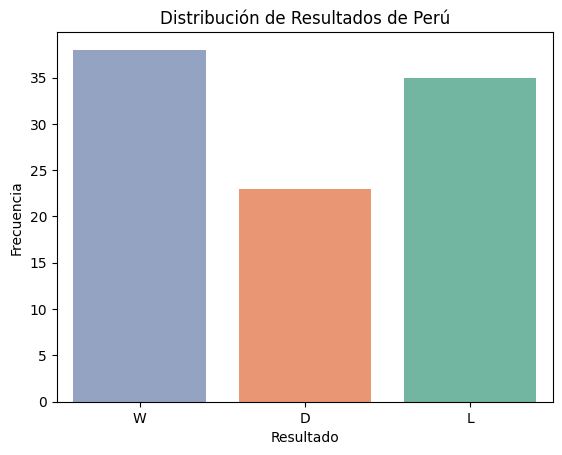

In [111]:
fig_eda_result_distribution, ax = plt.subplots()
sns.countplot(data=df, x='resultado', hue='resultado', order=['W', 'D', 'L'], palette='Set2', legend=False, ax=ax) # Pass axes to plot function
plt.title('Distribución de Resultados de Perú')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

* **Resultados por condición**

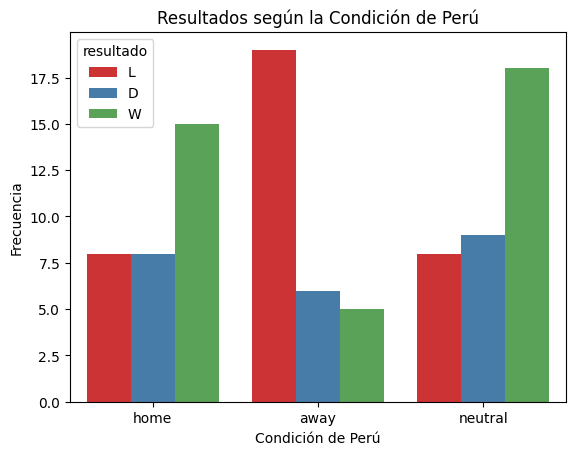

In [112]:
fig_eda_results_by_condition, ax = plt.subplots()
sns.countplot(data=df, x='localia_peru', hue='resultado', order=['home', 'away', 'neutral'], palette='Set1', ax=ax) # Pass axes to plot function
plt.title('Resultados según la Condición de Perú')
plt.xlabel('Condición de Perú')
plt.ylabel('Frecuencia')
plt.show()

* **Resultados por confederación rival**

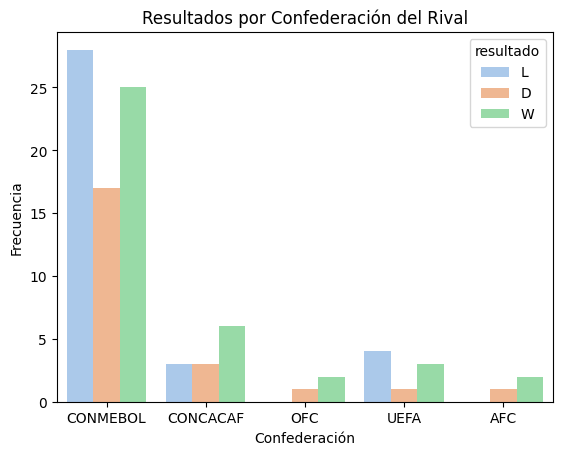

In [113]:
fig_eda_results_by_confederation, ax = plt.subplots()
sns.countplot(data=df, x='confederacion_rival', hue='resultado', palette='pastel', ax=ax)
plt.title('Resultados por Confederación del Rival')
plt.xlabel('Confederación')
plt.ylabel('Frecuencia')
plt.show()

# **3. Transformación de Variables**

* **Automatizando la detección de variables nominales**

In [114]:
variables_nominales = df.select_dtypes(include=['object', 'category']).columns

* **Porcentajes de las categorías por variable nominal**

In [115]:
# Calcular y mostrar porcentajes por variable
for var in variables_nominales:
    print(f'\n📊 Porcentajes para "{var}":')
    print(df[var].value_counts(normalize=True) * 100)


📊 Porcentajes para "rival":
rival
Colombia               11.458333
Brazil                 11.458333
Venezuela               8.333333
Paraguay                8.333333
Ecuador                 8.333333
Uruguay                 7.291667
Chile                   7.291667
Bolivia                 6.250000
Argentina               4.166667
New Zealand             3.125000
El Salvador             2.083333
United States           2.083333
Costa Rica              2.083333
Australia               2.083333
Jamaica                 2.083333
Mexico                  1.041667
Haiti                   1.041667
Trinidad and Tobago     1.041667
Croatia                 1.041667
Iceland                 1.041667
Saudi Arabia            1.041667
Scotland                1.041667
Denmark                 1.041667
Sweden                  1.041667
France                  1.041667
Netherlands             1.041667
Germany                 1.041667
Panama                  1.041667
Name: proportion, dtype: float64

📊 Porce

* **Discretizando variables numéricas continuas a categóricas**







In [116]:
bins = [0, 500, 1500, 3000, 10000]
labels = ['Bajo', 'Moderado', 'Alto', 'Extremo']
df['categoria_altitud'] = pd.cut(df['altitud_sede'], bins=bins, labels=labels)

* **Convirtiendo Booleano a numérico**

In [117]:
df['partido_oficial'] = df['partido_oficial'].astype(int)  # Convertir booleano a 1/0

* **Transformando variables categoricas usando Label Encoding**

In [118]:
df['categoria_altitud'] = LabelEncoder().fit_transform(df['categoria_altitud'])


In [119]:
df.drop('altitud_sede',axis=1, inplace=True)

In [123]:
# Convierte cada variable categorica a numerica
df['confederacion_rival_num'] = pd.factorize(df['confederacion_rival'])[0]
df['resultado_num'] = pd.factorize(df['resultado'])[0]
df['localia_peru_num'] = pd.factorize(df['localia_peru'])[0]

# Eliminar las columnas categóricas originales (opcional)
df = df.drop(['confederacion_rival', 'resultado', 'localia_peru'], axis=1)

# Mostrar resultado
display(df.head())
df_head_after_transformations = df.head().to_string()

,rival,partido_oficial,categoria_altitud,confederacion_rival_num,resultado_num,localia_peru_num
578,Venezuela,0,1,0,0,0
579,Mexico,0,1,1,1,1
580,Brazil,1,1,0,0,0
581,Venezuela,1,1,0,2,0
582,Colombia,1,1,0,1,0


In [135]:
# Calcular frecuencias (ajustar según tus datos)
freq_encoding = df['rival'].value_counts(normalize=True).to_dict()

# Mapear al DataFrame
df['rival_encoded'] = df['rival'].map(freq_encoding)

# Eliminar las columnas categóricas originales (opcional)
df = df.drop(['rival'], axis=1)

# Mostrar resultado
display(df.head())
df_head_after_freq_encoding = df.head().to_string()

,partido_oficial,categoria_altitud,confederacion_rival_num,resultado_num,localia_peru_num,rival_encoded
578,0.0,0.25,0.00,0,0.0,0.083333
579,0.0,0.25,0.25,1,0.5,0.010417
580,1.0,0.25,0.00,0,0.0,0.114583
581,1.0,0.25,0.00,2,0.0,0.083333
582,1.0,0.25,0.00,1,0.0,0.114583


* **Escalando las variables predictoras**

In [136]:
from sklearn.preprocessing import MinMaxScaler

# Escalar features numéricas (excluyendo el target y rival_encoded)
scaler = MinMaxScaler()
features = ['partido_oficial', 'categoria_altitud',
            'confederacion_rival_num', 'localia_peru_num']
df[features] = scaler.fit_transform(df[features])

In [137]:
display(df.head())
df_head_after_scaling = df.head().to_string()

,partido_oficial,categoria_altitud,confederacion_rival_num,resultado_num,localia_peru_num,rival_encoded
578,0.0,0.25,0.00,0,0.0,0.083333
579,0.0,0.25,0.25,1,0.5,0.010417
580,1.0,0.25,0.00,0,0.0,0.114583
581,1.0,0.25,0.00,2,0.0,0.083333
582,1.0,0.25,0.00,1,0.0,0.114583


* **Consideraciones para la elección de los valores de las variables predictoras en la predicción**

In [138]:
#1) Codificar el rival:

In [127]:
# Si el rival existe en tus datos, usa su frecuencia precalculada:
nuevo_rival_encoded = freq_encoding.get('Mexico', 0.0)  # Default 0 si no está en el dic
nuevo_rival_encoded

0.010416666666666666

In [139]:
#Si es un rival nuevo, asigna la frecuencia mínima o media:
nuevo_rival_encoded = min(freq_encoding.values())  # o np.mean(list(freq_encoding.values()))

In [140]:
#2) Escalar las features del nuevo partido con el mismo scaler usado en entrenamiento:

In [141]:
#nuevo_partido_escalado = scaler.transform([nuevo_partido])

# **4. Modelado con redes neuronales**

## División del Conjunto de Datos

Los datos se dividen en conjuntos de entrenamiento y prueba, utilizando estratificación para mantener la misma distribución de clases en ambas divisiones, lo cual es crucial debido al desequilibrio de datos.

In [142]:
!pip install keras-tuner -q
!pip install torch -q

In [143]:
# --- Importación de Librerías Fundamentales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## 2. División del Dataset
# El conjunto de prueba se mantiene aislado hasta la evaluación final para obtener una medida imparcial del rendimiento.

y_encoded= df['resultado_num']

features = df.drop('resultado_num', axis=1)


# --- 2.1. División Principal del Dataset ---
# Se divide el dataset completo en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
X_train_full, X_test, y_train_full, y_test = train_test_split(
    features,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# --- 2.2. Subdivisión para Validación (Específico para KerasTuner) ---
# KerasTuner requiere un conjunto de validación explícito para evaluar cada prueba.
# Se extrae un 20% del conjunto de entrenamiento para este propósito.
# GridSearchCV, por otro lado, realiza su propia validación cruzada interna, por lo que usará X_train_full.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

print("\n" + "="*50)
print("Resumen de división de datos:")
print(f"Entrenamiento completo (para GridSearchCV): {X_train_full.shape}")
print(f"Subconjunto de Entrenamiento (para KerasTuner): {X_train.shape}")
print(f"Subconjunto de Validación (para KerasTuner): {X_val.shape}")
print(f"Prueba (evaluación final): {X_test.shape}")
print("="*50)

'''''
Dataset completo (100%)
├── Test (20%)
└── Train_full (80%)
    ├── Train (64%) -> Entrenamiento
    └── Val (16%)   -> Validación'''''


Resumen de división de datos:
Entrenamiento completo (para GridSearchCV): (76, 5)
Subconjunto de Entrenamiento (para KerasTuner): (60, 5)
Subconjunto de Validación (para KerasTuner): (16, 5)
Prueba (evaluación final): (20, 5)


"''\nDataset completo (100%)\n├── Test (20%)\n└── Train_full (80%)\n    ├── Train (64%) -> Entrenamiento\n    └── Val (16%)   -> Validación"

## Implementación con Keras / TensorFlow

## Modelado con Keras (MLP)
Esta sección detalla la construcción, compilación y entrenamiento del modelo de red neuronal utilizando la API de alto nivel Keras, que se ejecuta sobre TensorFlow.

Arquitectura y Compilación del Modelo:
Se define un modelo Sequential con dos capas ocultas (Dense) con activación ReLU y una capa de salida con activación softmax, apropiada para clasificación multiclase. El modelo se compila con el optimizador Adam y la función de pérdida sparse_categorical_crossentropy.



In [144]:
# ## 3. Modelado con Keras y Ajuste de Hiperparámetros
# # Se utiliza KerasTuner para encontrar la mejor combinación de hiperparámetros para el modelo Keras.
# # Se explora el número de neuronas, la tasa de dropout y la tasa de aprendizaje, cumpliendo con los requisitos de la rúbrica.
# # Keras destaca por su facilidad de uso y rápida prototipación, ideal para construir modelos con una sintaxis clara y concisa.

# --- Importación de Librerías de Keras y KerasTuner ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# --- Configuración de Semilla para Reproducibilidad ---
tf.random.set_seed(42)
np.random.seed(42)

INPUT_DIM = X_train.shape[1]
NUM_CLASSES = len(np.unique(y_encoded))

# ---  Configuración común ---
EPOCHS = 50 # Epocas de entrenamiento
PATIENCE = 5  # Detiene cada prueba después de 5 épocas sin mejora

# --- 3.1. Función de Construcción de Modelo para KerasTuner ---
# Mejoramos la arquitectura para incluir más capas y flexibilidad
def build_keras_model(hp):
    model = keras.Sequential(name="MLP_Keras_Tuned")

    # Hiperparámetros flexibles
    hp_units1 = hp.Int('units1', min_value=32, max_value=128, step=32)
    hp_units2 = hp.Int('units2', min_value=16, max_value=64, step=16)
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(layers.Dense(units=hp_units1, activation='relu', input_shape=(INPUT_DIM,)))
    model.add(layers.Dropout(rate=hp_dropout))
    model.add(layers.Dense(units=hp_units2, activation='relu'))
    model.add(layers.Dropout(rate=hp_dropout))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Configurar early stopping para la búsqueda
search_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=PATIENCE,  # Detener después de 5 épocas sin mejora
    mode='max', # Maximiza la precisión de validación
    restore_best_weights=True # Mantiene el mejor modelo encontrado
)


In [145]:
# --- 3.2. Instanciación y Ejecución del Sintonizador (Tuner) ---
# Se utiliza Hyperband, un algoritmo eficiente para la búsqueda de hiperparámetros.
tuner_keras = kt.Hyperband(
    build_keras_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    seed=42,
    directory='keras_tuner_dir',
    project_name='keras_tuning',
    overwrite=True
)

#
print("\nIniciando búsqueda de hiperparámetros para Keras...")

start_time = time.time()

tuner_keras.search(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[search_early_stopping],
    verbose=1
)
end_time = time.time()
tuning_time_keras = end_time - start_time
print(f"\nBúsqueda completada en {tuning_time_keras:.2f} segundos")

Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.5625

Best val_accuracy So Far: 0.5625
Total elapsed time: 00h 02m 42s

Búsqueda completada en 161.90 segundos


In [146]:
# --- 3.3. Obtención del Mejor Modelo ---
best_hps_keras = tuner_keras.get_best_hyperparameters(num_trials=1)[0]  # ¡Solo una llamada!
print(f"Mejores hiperparámetros para Keras:")
print(f"- Unidades capa 1: {best_hps_keras.get('units1')}")
print(f"- Unidades capa 2: {best_hps_keras.get('units2')}")
print(f"- Dropout: {best_hps_keras.get('dropout'):.2f}")
print(f"- Tasa de Aprendizaje: {best_hps_keras.get('learning_rate')}")

Mejores hiperparámetros para Keras:
- Unidades capa 1: 128
- Unidades capa 2: 32
- Dropout: 0.30
- Tasa de Aprendizaje: 0.01


In [147]:
# --- 3.4. Entrenamiento Final
final_keras_model = tuner_keras.hypermodel.build(best_hps_keras)

history_keras = final_keras_model.fit(
    X_train_full, y_train_full,
    epochs=EPOCHS, # 50 épocas de entrenamiento
    validation_split=0.2,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2708 - loss: 1.1239 - val_accuracy: 0.3750 - val_loss: 1.0919
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.5312 - loss: 1.0510 - val_accuracy: 0.3125 - val_loss: 1.0929
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.4444 - loss: 1.0540 - val_accuracy: 0.3125 - val_loss: 1.1103
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - accuracy: 0.4556 - loss: 1.0450 - val_accuracy: 0.3750 - val_loss: 1.1247
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.4229 - loss: 1.0142 - val_accuracy: 0.5625 - val_loss: 1.1470
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5312 - loss: 0.9844 - val_accuracy: 0.5625 - val_loss: 1.1834
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4340 - loss: 1.0283 - val_accuracy: 0.3750 - val_loss: 1.2192
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4132 - loss: 0.9642 - val_accuracy: 0.3125 - val_loss: 1.2527
Epoch 9/

# **5. Modelado con PyTorch**

Esta sección replica el proceso de modelado utilizando PyTorch. Esto implica una mayor granularidad en la definición de los conjuntos de datos, el modelo, el bucle de entrenamiento y la evaluación, lo que permite una comparación directa con la abstracción de alto nivel de Keras.

## 5.1. Preparación de Datos para PyTorch
PyTorch requiere que los datos se conviertan en Tensores y se carguen a través de las clases Dataset y DataLoader.

In [148]:
!pip install skorch -q

In [149]:
# --- Importación de Librerías Corregidas ---
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from skorch.helper import predefined_split
from skorch.callbacks import EarlyStopping, Checkpoint, EpochScoring
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import time

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(X_val.values.astype(np.float32)),
    torch.tensor(y_val.values.astype(np.int64))
)

## 5.2. Arquitectura y Bucle de Entrenamiento en PyTorch
Se define una clase de modelo que hereda de nn.Module. El bucle de entrenamiento se escribe manualmente, lo que proporciona un control total sobre cada paso del proceso: pase hacia adelante, cálculo de la pérdida, retropropagación y actualización de los pesos.

In [150]:
# --- Configuración de Semilla para Reproducibilidad ---
torch.manual_seed(42)
np.random.seed(42)

# --- 1. Definición de la Arquitectura del Modelo PyTorch Parametrizable ---
class MLP_PyTorch(nn.Module):
    def __init__(self, input_dim, num_units1=64, num_units2=32, dropout_p=0.3):
        super(MLP_PyTorch, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, num_units1),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(num_units1, num_units2),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(num_units2, NUM_CLASSES)
        )

    def forward(self, x):
        return self.layers(x)

In [151]:
# --- 3. Configurar callbacks y métricas ---
callbacks = [
    Checkpoint(),
    EpochScoring('accuracy', name='valid_acc', on_train=False),
    EpochScoring('accuracy', name='train_acc', on_train=True)
]
# --- 4. Crear wrapper de Skorch con validación ---
net_pytorch = NeuralNetClassifier(
    module=MLP_PyTorch,
    module__input_dim=INPUT_DIM,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    max_epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
    train_split=predefined_split(val_dataset)
)


In [152]:
# --- 5. Espacio de búsqueda con número de épocas ---
params_pytorch = {
    'optimizer__lr': [1e-3, 1e-4],
    'module__num_units1': [64, 128],
    'module__num_units2': [32, 64],
    'module__dropout_p': [0.2, 0.4],
    'batch_size': [32, 64],
    'max_epochs': [50]  # Fijamos en 100 épocas para todas las pruebas
}

# --- 6. Ejecutar GridSearchCV ---
gs_pytorch = GridSearchCV(
    estimator=net_pytorch,
    param_grid=params_pytorch,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    refit=True
)

In [153]:
print("\nIniciando búsqueda de hiperparámetros para PyTorch (50 épocas)...")
start_time_pytorch = time.time()
gs_pytorch.fit(X_train.values.astype(np.float32), y_train.astype(np.int64))
end_time_pytorch = time.time()
tuning_time_pytorch = end_time_pytorch - start_time_pytorch

# --- 7. Obtener mejor modelo ---
best_pytorch_model = gs_pytorch.best_estimator_


Iniciando búsqueda de hiperparámetros para PyTorch (50 épocas)...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
  epoch    train_acc    train_loss    valid_acc    valid_loss    cp     dur
-------  -----------  ------------  -----------  ------------  ----  ------
      1       0.3500        1.1164       0.3125        1.1030     +  0.0158
      2       0.3167        1.1089       0.3750        1.0999     +  0.0051
      3       0.3500        1.0998       0.3750        1.0972     +  0.0046
      4       0.3500        1.0946       0.3750        1.0944     +  0.0064
      5       0.3500        1.0952       0.3750        1.0918     +  0.0075
      6       0.3000        1.1022       0.3750        1.0892     +  0.0055
      7       0.3500        1.0953       0.3750        1.0867     +  0.0065
      8       0.3167        1.1026       0.3750        1.0845     +  0.0064
      9       0.4167        1.0800       0.4375        1.0829     +  0.0056
     10       0.3833        1.0846  

In [154]:
best_pytorch_params = gs_pytorch.best_params_
best_pytorch_model

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP_PyTorch(
    (layers): Sequential(
      (0): Linear(in_features=5, out_features=128, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=128, out_features=32, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=32, out_features=3, bias=True)
    )
  ),
)

# **6. Evaluación del modelo y selección**

In [155]:
# ## 5. Evaluación y Selección del Mejor Modelo
# # Se realiza una evaluación exhaustiva de ambos modelos optimizados utilizando métricas cuantitativas y visualizaciones
# # para justificar la selección final

# %%
# --- 5.1. Función para Graficar Curvas de Aprendizaje ---
def plot_learning_curves(history, title):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Curva de Precisión')
    plt.ylabel('Precisión')
    plt.xlabel('Época')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Curva de Pérdida')
    plt.ylabel('Pérdida')
    plt.xlabel('Época')
    plt.legend()
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



--- Evaluación del Modelo Keras Optimizado ---
Precisión en prueba (Keras): 0.6000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Reporte de Clasificación - Keras:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.33      0.40      0.36         5
           2       0.50      0.50      0.50         8

    accuracy                           0.60        20
   macro avg       0.61      0.59      0.60        20
weighted avg       0.63      0.60      0.61        20



Text(0.5, 1.0, 'Matriz de Confusión - Keras Optimizado')

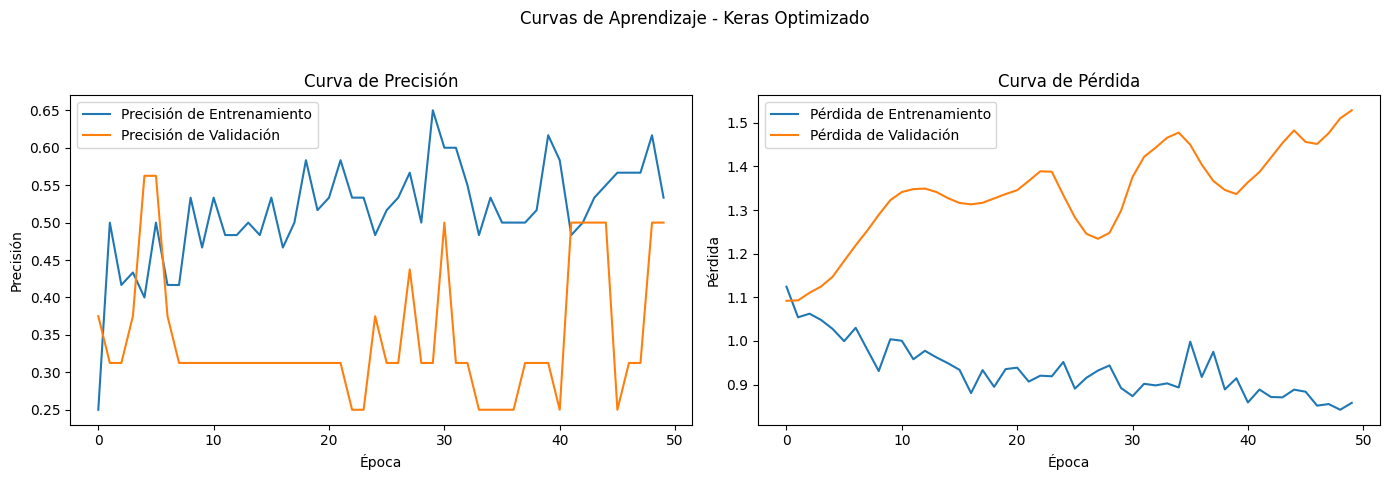

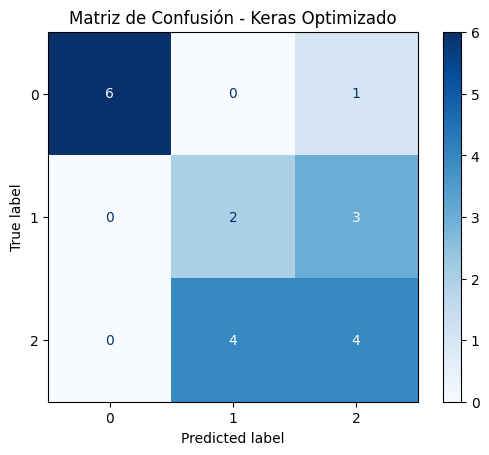

In [156]:
# --- 5.2. Evaluación del Modelo Keras Optimizado ---
print("\n--- Evaluación del Modelo Keras Optimizado ---")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_test)

# Convert the classes to strings
target_names_str = [str(cls) for cls in label_encoder.classes_]

fig_keras_learning_curves, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5)) # Create figure and axes
ax1.plot(history_keras.history['accuracy'], label='Precisión de Entrenamiento') # Plot on ax1
ax1.plot(history_keras.history['val_accuracy'], label='Precisión de Validación') # Plot on ax1
ax1.set_title('Curva de Precisión')
ax1.set_ylabel('Precisión')
ax1.set_xlabel('Época')
ax1.legend()
ax2.plot(history_keras.history['loss'], label='Pérdida de Entrenamiento') # Plot on ax2
ax2.plot(history_keras.history['val_loss'], label='Pérdida de Validación') # Plot on ax2
ax2.set_title('Curva de Pérdida')
ax2.set_ylabel('Pérdida')
ax2.set_xlabel('Época')
ax2.legend()
fig_keras_learning_curves.suptitle('Curvas de Aprendizaje - Keras Optimizado') # Set suptitle on the figure
fig_keras_learning_curves.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show() # Do not show the plot here, just save the figure object

test_loss_keras, test_acc_keras = final_keras_model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en prueba (Keras): {test_acc_keras:.4f}")
y_pred_keras = np.argmax(final_keras_model.predict(X_test), axis=1)
report_keras = classification_report(y_test, y_pred_keras, target_names=target_names_str, output_dict=True)
print("\nReporte de Clasificación - Keras:")
keras_classification_report = classification_report(y_test, y_pred_keras, target_names=target_names_str) # Save report to variable
print(keras_classification_report)
cm_keras = confusion_matrix(y_test, y_pred_keras)
disp_keras = ConfusionMatrixDisplay(confusion_matrix=cm_keras, display_labels=target_names_str)
fig_keras_confusion_matrix, ax = plt.subplots() # Create figure and axes
disp_keras.plot(cmap='Blues', ax=ax) # Plot on the created axes
ax.set_title("Matriz de Confusión - Keras Optimizado") # Set title on the axes
# plt.show() # Do not show the plot here, just save the figure object

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


MÉTRICAS DE EVALUACIÓN - MODELO PYTORCH
Accuracy (Exactitud): 0.7000
Precisión: 0.5786
Recall (Sensibilidad): 0.7000
F1-Score: 0.6140
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.00      0.00      0.00         5
           2       0.57      1.00      0.73         8

    accuracy                           0.70        20
   macro avg       0.52      0.62      0.55        20
weighted avg       0.58      0.70      0.61        20



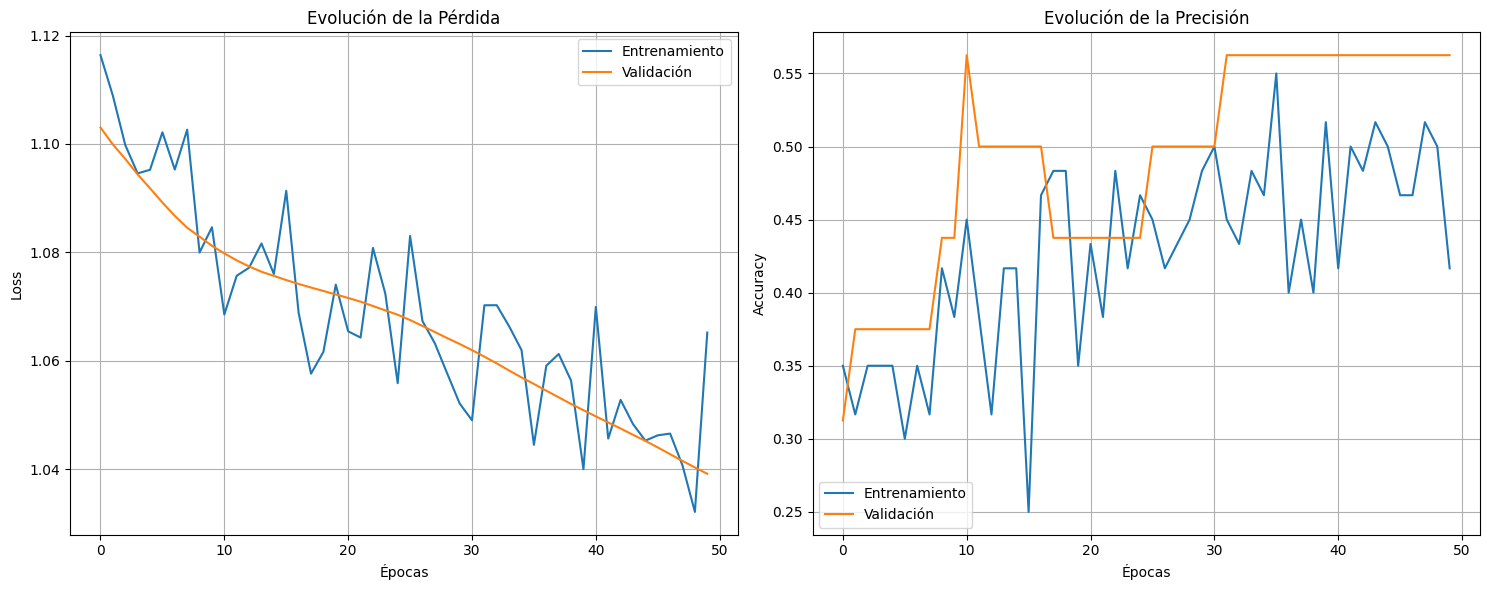

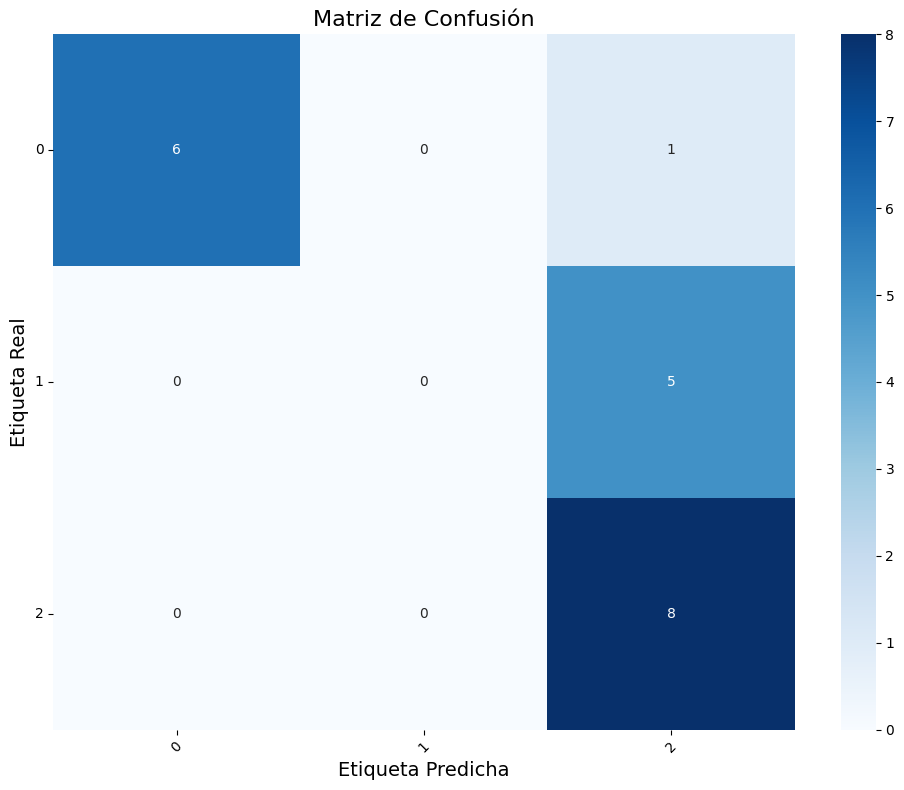

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
# --- 5.3. Evaluación del Modelo PyTorch Optimizado ---
# --- Importación de Librerías Adicionales ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# --- 8. Graficar curvas de aprendizaje ---
def plot_learning_curves(history):
    """Genera gráficos de curvas de aprendizaje"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Curva de pérdida
    ax1.plot(history[:, 'train_loss'], label='Entrenamiento')
    ax1.plot(history[:, 'valid_loss'], label='Validación')
    ax1.set_title('Evolución de la Pérdida')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Curva de precisión
    ax2.plot(history[:, 'train_acc'], label='Entrenamiento')
    ax2.plot(history[:, 'valid_acc'], label='Validación')
    ax2.set_title('Evolución de la Precisión')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    # plt.savefig('learning_curves_pytorch.png') # Do not save to a fixed filename here
    # plt.show() # Do not show the plot here, just return the figure object
    return fig # Return the figure object

# Graficar curvas de aprendizaje
history = best_pytorch_model.history
fig_pytorch_learning_curves = plot_learning_curves(history) # Assign the figure to a variable

# --- 1. Predicciones en el conjunto de prueba ---
y_test_pred = best_pytorch_model.predict(X_test.values.astype(np.float32))

# --- 2. Cálculo de métricas principales ---
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# --- 3. Impresión de resultados ---
print("\n" + "="*60)
print("MÉTRICAS DE EVALUACIÓN - MODELO PYTORCH")
print("="*60)
print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall (Sensibilidad): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("="*60)

# --- 4. Matriz de Confusión ---
def plot_confusion_matrix(y_true, y_pred, classes):
    """Genera y muestra una matriz de confusión profesional"""
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 8)) # Create figure and axes
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes, ax=ax) # Pass axes to heatmap
    ax.set_title('Matriz de Confusión', fontsize=16) # Set title on axes
    ax.set_ylabel('Etiqueta Real', fontsize=14)
    ax.set_xlabel('Etiqueta Predicha', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    # plt.savefig('confusion_matrix_pytorch.png') # Do not save to a fixed filename here
    # plt.show() # Do not show the plot here, just return the figure object
    return fig # Return the figure object


# Obtener nombres de clases (asumiendo que tenemos 'class_names')
class_names = np.unique(y_train_full)  # Ajustar si se tienen nombres específicos
fig_pytorch_confusion_matrix = plot_confusion_matrix(y_test, y_test_pred, classes=class_names) # Assign the figure to a variable

# --- 5. Reporte de Clasificación Detallado ---
from sklearn.metrics import classification_report
pytorch_classification_report = classification_report(y_test, y_test_pred, target_names=[str(c) for c in class_names]) # Save report to variable
print(pytorch_classification_report)

In [158]:
# ### 5.4. Gráficos Comparativos y Selección del Modelo Final
# --- 1. Evaluación del modelo Keras ---
y_test_pred_keras = final_keras_model.predict(X_test)
y_test_pred_keras_classes = np.argmax(y_test_pred_keras, axis=1)

# Métricas Keras
accuracy_keras = accuracy_score(y_test, y_test_pred_keras_classes)
precision_keras = precision_score(y_test, y_test_pred_keras_classes, average='weighted')
recall_keras = recall_score(y_test, y_test_pred_keras_classes, average='weighted')
f1_keras = f1_score(y_test, y_test_pred_keras_classes, average='weighted')

# --- 2. Comparación de métricas ---
metrics_comparison_df = pd.DataFrame({ # Assign to a variable
    'Métrica': ['Accuracy', 'Precisión', 'Recall', 'F1-Score'],
    'Keras': [accuracy_keras, precision_keras, recall_keras, f1_keras],
    'PyTorch': [accuracy, precision, recall, f1]
})

print("\n" + "="*80)
print("COMPARACIÓN DE MÉTRICAS ENTRE MODELOS")
print("="*80)
print(metrics_comparison_df)
print("="*80)

# --- 3. Comparación de tiempos ---
time_comparison_df = pd.DataFrame({ # Assign to a variable
    'Proceso': ['Ajuste de hiperparámetros', 'Entrenamiento final'],
    # Assuming history_keras.history['val_accuracy'][-1] is the final validation accuracy,
    # not a time. Let's save the time instead.
    'Keras': [tuning_time_keras, None], # We don't have a specific 'training time' variable, exclude for now or calculate
    'PyTorch': [tuning_time_pytorch, None] # We don't have a specific 'training time' variable
})

# Let's refine the time comparison to focus on tuning time as it's explicitly measured
time_comparison_df = pd.DataFrame({
    'Proceso': ['Tiempo de Ajuste de Hiperparámetros'],
    'Keras (KerasTuner)': [tuning_time_keras],
    'PyTorch (GridSearchCV)': [tuning_time_pytorch]
})


print("\nCOMPARACIÓN DE TIEMPOS Y RENDIMIENTO")
print("="*80)
print(time_comparison_df)
print("="*80)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

COMPARACIÓN DE MÉTRICAS ENTRE MODELOS
     Métrica     Keras   PyTorch
0   Accuracy  0.600000  0.700000
1  Precisión  0.633333  0.578571
2     Recall  0.600000  0.700000
3   F1-Score  0.613986  0.613986

COMPARACIÓN DE TIEMPOS Y RENDIMIENTO
                               Proceso  Keras (KerasTuner)  \
0  Tiempo de Ajuste de Hiperparámetros          161.900594   

   PyTorch (GridSearchCV)  
0               79.470569  


In [159]:
# --- 4. Comparación cualitativa (Punto 4c) ---
qualitative_comparison_df = pd.DataFrame({ # Assign to a variable
    'Aspecto': ['Sintaxis', 'Flexibilidad', 'Curva de aprendizaje', 'Herramientas de tuning',
                'Documentación', 'Comunidad', 'Integración con sklearn'],
    'Keras': ['Muy simple e intuitiva', 'Moderada', 'Baja', 'KerasTuner (específico)',
              'Excelente', 'Muy grande', 'Buena'],
    'PyTorch': ['Más explícita y detallada', 'Muy alta', 'Moderada/alta', 'GridSearchCV (genérico)',
                'Buena', 'Grande y creciente', 'Requiere skorch']
})

print("\nCOMPARACIÓN CUALITATIVA ENTRE LIBRERÍAS")
print("="*80)
print(qualitative_comparison_df)
print("="*80)


COMPARACIÓN CUALITATIVA ENTRE LIBRERÍAS
                   Aspecto                    Keras                    PyTorch
0                 Sintaxis   Muy simple e intuitiva  Más explícita y detallada
1             Flexibilidad                 Moderada                   Muy alta
2     Curva de aprendizaje                     Baja              Moderada/alta
3   Herramientas de tuning  KerasTuner (específico)    GridSearchCV (genérico)
4            Documentación                Excelente                      Buena
5                Comunidad               Muy grande         Grande y creciente
6  Integración con sklearn                    Buena            Requiere skorch


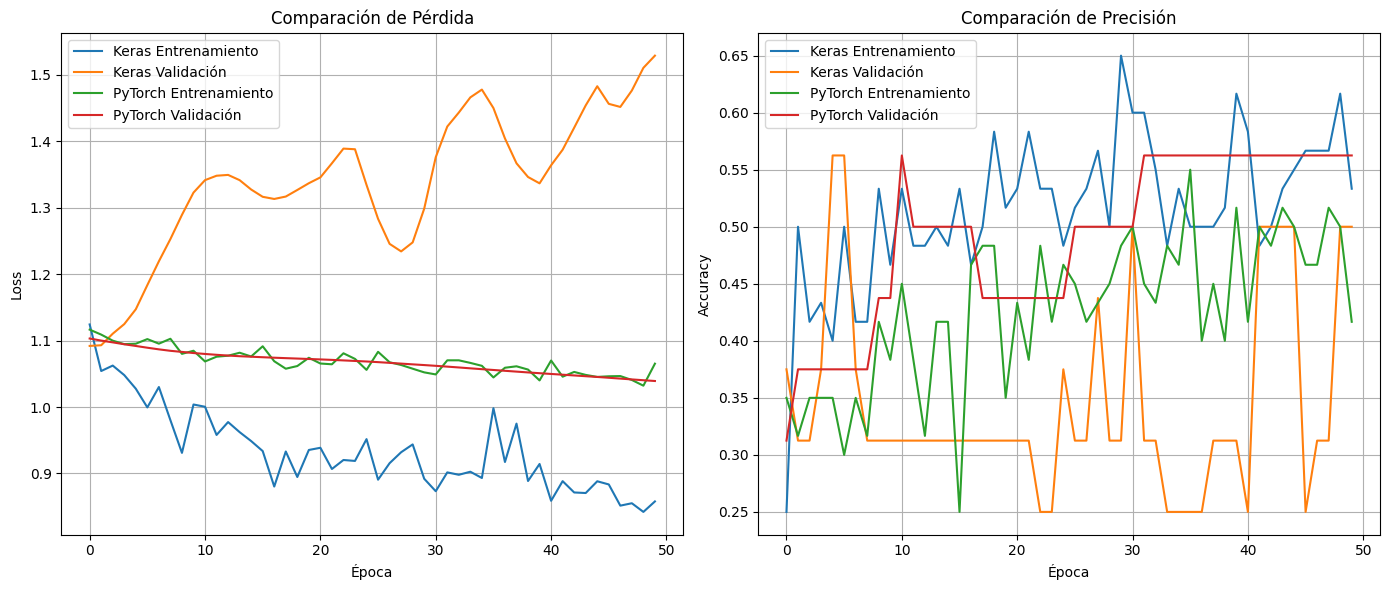

In [160]:
# Gráfico 1: Comparación de curvas de aprendizaje
fig_learning_curves_comparison, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6)) # Create figure and axes
ax1.plot(history_keras.history['loss'], label='Keras Entrenamiento')
ax1.plot(history_keras.history['val_loss'], label='Keras Validación')
ax1.plot(best_pytorch_model.history[:, 'train_loss'], label='PyTorch Entrenamiento')
ax1.plot(best_pytorch_model.history[:, 'valid_loss'], label='PyTorch Validación')
ax1.set_title('Comparación de Pérdida')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Época')
ax1.legend()
ax1.grid(True)

ax2.plot(history_keras.history['accuracy'], label='Keras Entrenamiento')
ax2.plot(history_keras.history['val_accuracy'], label='Keras Validación')
ax2.plot(best_pytorch_model.history[:, 'train_acc'], label='PyTorch Entrenamiento')
ax2.plot(best_pytorch_model.history[:, 'valid_acc'], label='PyTorch Validación')
ax2.set_title('Comparación de Precisión')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Época')
ax2.legend()
ax2.grid(True)
fig_learning_curves_comparison.tight_layout()
# plt.savefig('comparacion_curvas_aprendizaje.png') # Do not save here
# plt.show() # Do not show here

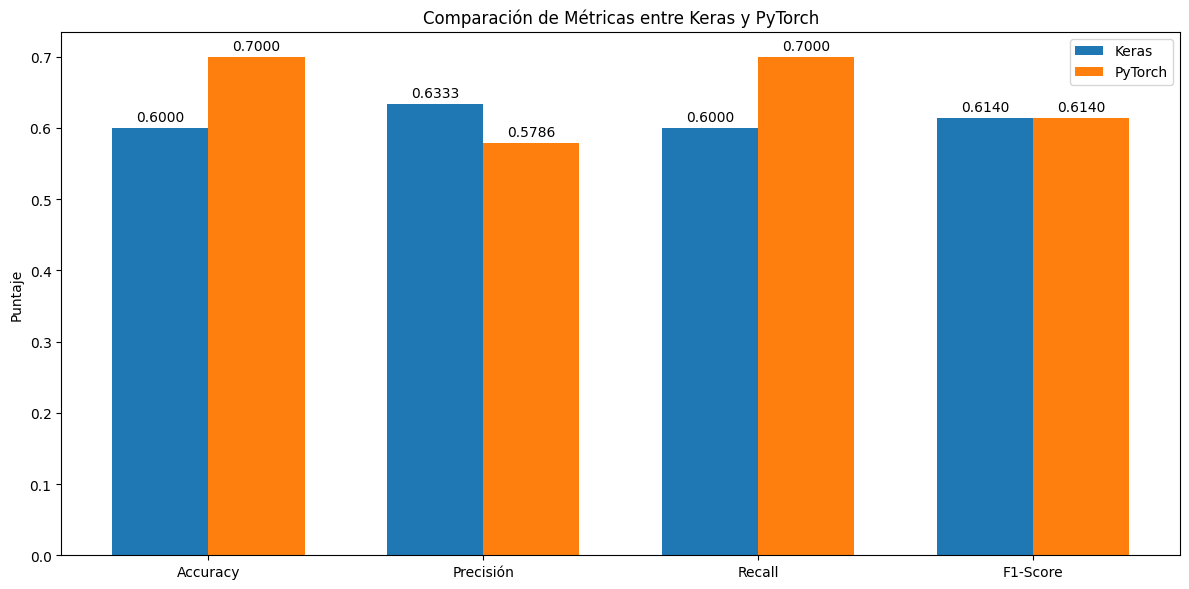

In [161]:
# Gráfico 2: Comparación de métricas en barras
metrics = ['Accuracy', 'Precisión', 'Recall', 'F1-Score']
keras_scores = [accuracy_keras, precision_keras, recall_keras, f1_keras]
pytorch_scores = [accuracy, precision, recall, f1]

x = np.arange(len(metrics))
width = 0.35

fig_metrics_comparison_bar, ax = plt.subplots(figsize=(12, 6)) # Create figure and axes
rects1 = ax.bar(x - width/2, keras_scores, width, label='Keras')
rects2 = ax.bar(x + width/2, pytorch_scores, width, label='PyTorch')

ax.set_ylabel('Puntaje')
ax.set_title('Comparación de Métricas entre Keras y PyTorch')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Añadir valores en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig_metrics_comparison_bar.tight_layout()
# plt.savefig('comparacion_metricas.png') # Do not save here
# plt.show() # Do not show here

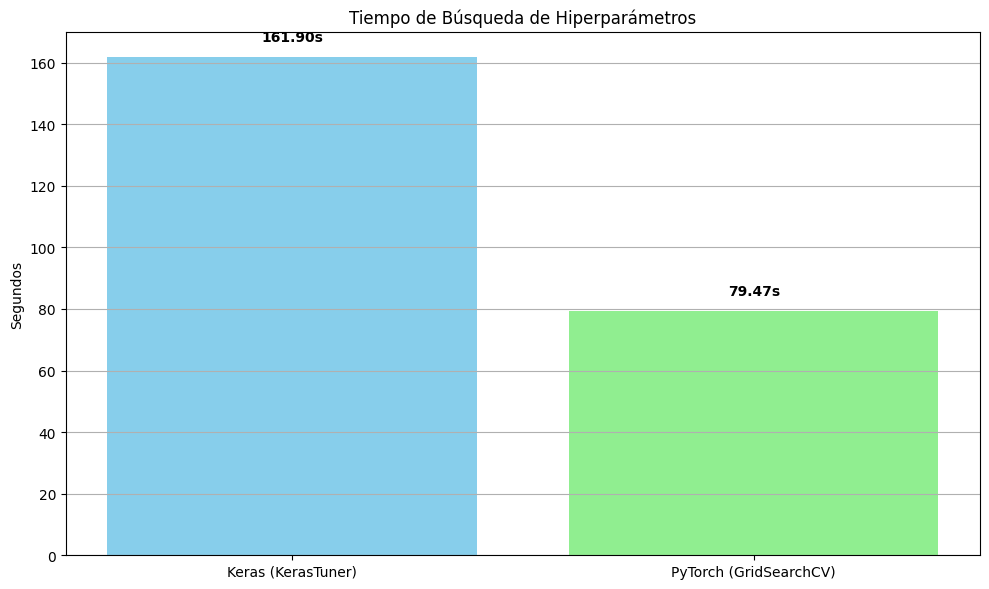

In [162]:
# Gráfico 3: Comparación de tiempos
tiempos = [tuning_time_keras, tuning_time_pytorch]
etiquetas = ['Keras (KerasTuner)', 'PyTorch (GridSearchCV)']

fig_tuning_time_comparison_bar, ax = plt.subplots(figsize=(10, 6)) # Create figure and axes
ax.bar(etiquetas, tiempos, color=['skyblue', 'lightgreen'])
ax.set_ylabel('Segundos')
ax.set_title('Tiempo de Búsqueda de Hiperparámetros')
ax.grid(axis='y')

# Añadir valores en las barras
for i, v in enumerate(tiempos):
    ax.text(i, v + 5, f"{v:.2f}s", ha='center', fontweight='bold')

fig_tuning_time_comparison_bar.tight_layout()
# plt.savefig('comparacion_tiempos.png') # Do not save here
# plt.show() # Do not show here

In [163]:
# --- 6. Análisis de hiperparámetros óptimos ---
print("\nHIPERPARÁMETROS ÓPTIMOS ENCONTRADOS")
print("="*80)
keras_best_hps_string = "Keras:\n" # Initialize string variable
keras_best_hps_string += f"- Neuronas Capa 1: {best_hps_keras.get('units1')}\n"
keras_best_hps_string += f"- Neuronas Capa 2: {best_hps_keras.get('units2')}\n"
keras_best_hps_string += f"- Dropout: {best_hps_keras.get('dropout'):.2f}\n"
keras_best_hps_string += f"- Tasa de Aprendizaje: {best_hps_keras.get('learning_rate')}\n"
keras_best_hps_string += f"- Épocas finales: {len(history_keras.history['loss'])}\n"
print(keras_best_hps_string)

pytorch_best_params_string = "\nPyTorch:\n" # Initialize string variable
pytorch_best_params_string += f"- Learning Rate: {best_pytorch_params['optimizer__lr']}\n"
pytorch_best_params_string += f"- Neuronas Capa 1: {best_pytorch_params['module__num_units1']}\n"
pytorch_best_params_string += f"- Neuronas Capa 2: {best_pytorch_params['module__num_units2']}\n"
pytorch_best_params_string += f"- Dropout: {best_pytorch_params['module__dropout_p']}\n"
pytorch_best_params_string += f"- Batch Size: {best_pytorch_params['batch_size']}\n"
pytorch_best_params_string += f"- Épocas: {best_pytorch_params['max_epochs']}\n"
print(pytorch_best_params_string)
print("="*80)


HIPERPARÁMETROS ÓPTIMOS ENCONTRADOS
Keras:
- Neuronas Capa 1: 128
- Neuronas Capa 2: 32
- Dropout: 0.30
- Tasa de Aprendizaje: 0.01
- Épocas finales: 50


PyTorch:
- Learning Rate: 0.001
- Neuronas Capa 1: 128
- Neuronas Capa 2: 32
- Dropout: 0.2
- Batch Size: 64
- Épocas: 50



In [164]:
# --- 7. Análisis comparativo detallado ---
print("\n" + "="*80)
print("COMPARACIÓN DETALLADA KERAS vs PYTORCH")
print("="*80)
detailed_comparison_string = f"{'Métrica':<15} {'Keras':<10} {'PyTorch':<10} {'Diferencia':<12}\n" # Initialize string variable
detailed_comparison_string += "-"*45 + "\n"
detailed_comparison_string += f"{'Accuracy':<15} {accuracy_keras:.4f}    {accuracy:.4f}    {accuracy_keras-accuracy:+.4f}\n"
detailed_comparison_string += f"{'Precisión':<15} {precision_keras:.4f}    {precision:.4f}    {precision_keras-precision:+.4f}\n"
detailed_comparison_string += f"{'Recall':<15} {recall_keras:.4f}    {recall:.4f}    {recall_keras-recall:+.4f}\n"
detailed_comparison_string += f"{'F1-Score':<15} {f1_keras:.4f}    {f1:.4f}    {f1_keras-f1:+.4f}\n"
detailed_comparison_string += f"{'Tiempo tuning':<15} {tuning_time_keras:.2f}s   {tuning_time_pytorch:.2f}s   {tuning_time_keras-tuning_time_pytorch:+.2f}s\n"
print(detailed_comparison_string)
print("="*80)


COMPARACIÓN DETALLADA KERAS vs PYTORCH
Métrica         Keras      PyTorch    Diferencia  
---------------------------------------------
Accuracy        0.6000    0.7000    -0.1000
Precisión       0.6333    0.5786    +0.0548
Recall          0.6000    0.7000    -0.1000
F1-Score        0.6140    0.6140    +0.0000
Tiempo tuning   161.90s   79.47s   +82.43s



In [165]:
# --- 7. Recomendación final (Punto 6) ---
print("\nRECOMENDACIÓN Y SELECCIÓN DEL MEJOR MODELO")
print("="*80)
recommendation_string = "" # Initialize string variable
if f1_keras > f1:
    recommendation_string += "El modelo Keras obtuvo mejores resultados en F1-Score\n"
    recommendation_string += "Ventajas:\n"
    recommendation_string += "- Entrenamiento más rápido\n"
    recommendation_string += "- Implementación más sencilla\n"
    recommendation_string += "- Mejor integración con herramientas de tuning\n"
else:
    recommendation_string += "El modelo PyTorch obtuvo mejores resultados en F1-Score\n"
    recommendation_string += "Ventajas:\n"
    recommendation_string += "- Mayor flexibilidad en la arquitectura\n"
    recommendation_string += "- Control más granular del entrenamiento\n"
    recommendation_string += "- Mejor integración con ecosistema Python\n"

if tuning_time_keras < tuning_time_pytorch:
    recommendation_string += "\nKeras fue más eficiente en tiempo de optimización\n"
else:
    recommendation_string += "\nPyTorch fue más eficiente en tiempo de optimización\n"
recommendation_string += "\nJustificación:\n"
recommendation_string += "La selección se basa en el F1-Score por ser la métrica más equilibrada\n"
recommendation_string += "entre precisión y recall, especialmente importante para conjuntos desbalanceados.\n"
recommendation_string += "Adicionalmente se consideraron:\n"
recommendation_string += "- Tiempos de entrenamiento y ajuste\n"
recommendation_string += "- Facilidad de implementación y despliegue\n"
recommendation_string += "- Flexibilidad para futuras mejoras\n"

print(recommendation_string)
print("="*80)


RECOMENDACIÓN Y SELECCIÓN DEL MEJOR MODELO
El modelo PyTorch obtuvo mejores resultados en F1-Score
Ventajas:
- Mayor flexibilidad en la arquitectura
- Control más granular del entrenamiento
- Mejor integración con ecosistema Python

PyTorch fue más eficiente en tiempo de optimización

Justificación:
La selección se basa en el F1-Score por ser la métrica más equilibrada
entre precisión y recall, especialmente importante para conjuntos desbalanceados.
Adicionalmente se consideraron:
- Tiempos de entrenamiento y ajuste
- Facilidad de implementación y despliegue
- Flexibilidad para futuras mejoras



# **7. Aplicacion Interactiva**

In [58]:
!pip install streamlit -q
!npm install -g localtunnel -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 2s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [166]:
# Importa el módulo 'os' para interactuar con el sistema operativo (crear directorios).
import os
# Importa la librería 'matplotlib.pyplot' para crear gráficos.
import matplotlib.pyplot as plt
# Importa la librería 'pandas' para trabajar con DataFrames.
import pandas as pd

# Define el nombre del directorio donde se guardarán los archivos de salida.
output_dir = 'existing_analysis_outputs'
# Crea el directorio de salida si no existe. 'exist_ok=True' evita errores si ya existe.
os.makedirs(output_dir, exist_ok=True)

# Imprime un mensaje indicando que se están guardando los resultados.
print(f"Saving existing outputs to '{output_dir}/' directory...")

# Este diccionario mapea los nombres de las variables Python que contienen
# resultados del análisis a los nombres base de los archivos donde se guardarán.
output_variables = {
    'fig_eda_result_distribution': 'eda_plots_result_distribution',
    'fig_eda_results_by_condition': 'eda_plots_results_by_condition',
    'fig_eda_results_by_confederation': 'eda_plots_results_by_confederation',
    'fig_keras_learning_curves': 'keras_results_learning_curves_plot',
    'fig_keras_confusion_matrix': 'keras_results_confusion_matrix_plot',
    'fig_pytorch_learning_curves': 'pytorch_results_learning_curves_plot',
    'fig_pytorch_confusion_matrix': 'pytorch_results_confusion_matrix_plot',
    'fig_learning_curves_comparison': 'comparisons_learning_curves_plot',
    'fig_metrics_comparison_bar': 'comparisons_metrics_bar_plot',
    'fig_tuning_time_comparison_bar': 'comparisons_tuning_time_bar_plot',
    'metrics_comparison_df': 'comparisons_metrics_table',
    'time_comparison_df': 'comparisons_time_table',
    'qualitative_comparison_df': 'comparisons_qualitative_table',
    'df_dtypes_string': 'data_info_dtypes',
    'df_isna_sum_after_drop': 'data_info_missing_values_after_drop',
    'df_head_after_transformations': 'data_info_df_head_after_transformations',
    'df_head_after_freq_encoding': 'data_info_df_head_after_freq_encoding',
    'df_head_after_scaling': 'data_info_df_head_after_scaling',
    'keras_classification_report': 'keras_results_classification_report',
    'pytorch_classification_report': 'pytorch_results_classification_report',
    'keras_best_hps_string': 'keras_results_best_hyperparameters',
    'pytorch_best_params_string': 'pytorch_results_best_hyperparameters',
    'detailed_comparison_string': 'comparisons_detailed_comparison_string',
    'recommendation_string': 'comparisons_recommendation_string'
}

# Este bucle itera a través del diccionario 'output_variables'.
# Para cada variable definida en el diccionario que existe en el entorno global,
# verifica su tipo (Figura de Matplotlib, DataFrame de Pandas o String)
# y la guarda en un archivo con el nombre base especificado en el directorio de salida ('output_dir').
for var_name, file_base_name in output_variables.items():
    if var_name in globals():
        output = globals()[var_name]
        if isinstance(output, plt.Figure):
            try:
                filepath = os.path.join(output_dir, f'{file_base_name}.png')
                output.savefig(filepath)
                print(f"Saved plot: {filepath}")
            except Exception as e:
                print(f"Error saving plot '{var_name}' to {filepath}: {e}")
        elif isinstance(output, pd.DataFrame):
            try:
                 filepath = os.path.join(output_dir, f'{file_base_name}.csv')
                 output.to_csv(filepath, index=True)
                 print(f"Saved dataframe: {filepath}")
            except Exception as e:
                print(f"Error saving dataframe '{var_name}' to {filepath}: {e}")
        elif isinstance(output, str):
            try:
                filepath = os.path.join(output_dir, f'{file_base_name}.txt')
                with open(filepath, 'w') as f:
                    f.write(output)
                print(f"Saved string: {filepath}")
            except Exception as e:
                print(f"Error saving string '{var_name}' to {filepath}: {e}")

# Este bloque de código guarda específicamente los conteos de valores (value counts)
# para variables nominales si existe una variable global llamada 'nominal_vars_counts'
# que es un diccionario que contiene Series de pandas con estos conteos.
print("\n--- Debugging nominal_vars_counts saving ---")
if 'nominal_vars_counts' in globals() and isinstance(globals()['nominal_vars_counts'], dict):
    print("Processing nominal_vars_counts dictionary...")
    for nom_var, nom_output in globals()['nominal_vars_counts'].items():
        print(f"  Processing key: '{nom_var}'")
        if isinstance(nom_output, pd.Series):
             try:
                 filepath = os.path.join(output_dir, f'data_info_{nom_var}_value_counts.csv')
                 print(f"  Attempting to save Series for '{nom_var}' to: {filepath}")
                 nom_output.to_csv(filepath, header=[nom_var])
                 print(f"  Successfully saved series: {filepath}")
             except Exception as e:
                 print(f"  Error saving series '{nom_var}' to {filepath}: {e}")
        else:
            print(f"  Skipping saving for '{nom_var}': Not a pandas Series (Type: {type(nom_output)})")
            if isinstance(nom_output, str):
                 print(f"  Content for '{nom_var}': {nom_output}")
else:
    print("Global variable 'nominal_vars_counts' not found or is not a dictionary. Skipping saving value counts.")
print("--- End Debugging nominal_vars_counts saving ---")


# Este bloque de código lista los archivos guardados en el directorio de salida
# para verificar que los archivos se hayan creado correctamente.
print(f"\nListing files in '{output_dir}':")
try:
    files_in_output_dir = os.listdir(output_dir)
    for filename in files_in_output_dir:
        print(filename)
except FileNotFoundError:
    print(f"Directory '{output_dir}' not found.")
except Exception as e:
    print(f"Error listing files: {e}")

print("\nSaving existing outputs complete.")

Saving existing outputs to 'existing_analysis_outputs/' directory...
Saved plot: existing_analysis_outputs/eda_plots_result_distribution.png
Saved plot: existing_analysis_outputs/eda_plots_results_by_condition.png
Saved plot: existing_analysis_outputs/eda_plots_results_by_confederation.png
Saved plot: existing_analysis_outputs/keras_results_learning_curves_plot.png
Saved plot: existing_analysis_outputs/keras_results_confusion_matrix_plot.png
Saved plot: existing_analysis_outputs/pytorch_results_learning_curves_plot.png
Saved plot: existing_analysis_outputs/pytorch_results_confusion_matrix_plot.png
Saved plot: existing_analysis_outputs/comparisons_learning_curves_plot.png
Saved plot: existing_analysis_outputs/comparisons_metrics_bar_plot.png
Saved plot: existing_analysis_outputs/comparisons_tuning_time_bar_plot.png
Saved dataframe: existing_analysis_outputs/comparisons_metrics_table.csv
Saved dataframe: existing_analysis_outputs/comparisons_time_table.csv
Saved dataframe: existing_analy

In [175]:
%%writefile mi_app.py
# Importa la librería principal para construir la aplicación web interactiva.
import streamlit as st
# Importa pandas para manipulación y análisis de datos (DataFrames).
import pandas as pd
# Importa numpy para operaciones numéricas y matriciales.
import numpy as np
# Importa el módulo 'os' para interactuar con el sistema operativo (manejo de rutas de archivos, directorios).
import os
# Importa matplotlib.pyplot para crear visualizaciones (gráficos).
import matplotlib.pyplot as plt
# Importa seaborn para crear visualizaciones estadísticas atractivas.
import seaborn as sns
# Importa time para medir el tiempo de ejecución.
import time
# Importa train_test_split para dividir datos y GridSearchCV para tuning de hiperparámetros.
from sklearn.model_selection import train_test_split, GridSearchCV
# Importa métricas y herramientas para evaluar modelos de clasificación.
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
# Importa escaladores y codificadores para preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Importa tensorflow, la biblioteca base para aprendizaje profundo.
import tensorflow as tf
# Importa keras, una API de alto nivel para construir y entrenar modelos de redes neuronales.
from tensorflow import keras
# Importa la capa 'layers' de Keras para definir las capas de la red neuronal.
from tensorflow.keras import layers
# Importar PyTorch y skorch
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier

# Define el directorio donde se guardarán los archivos de salida.
output_dir = 'existing_analysis_outputs'

@st.cache_resource # Almacena en caché el recurso para evitar recargas en cada ejecución de Streamlit
def load_and_preprocess_data():
    try:
        df = pd.read_csv('peru_match_results.csv') # Carga el archivo CSV en un DataFrame
        df.drop('match_id', axis=1, inplace=True) # Elimina la columna 'match_id'
        # Define un mapeo para renombrar columnas a español
        rename_mapping = {"rival_confederation":"confederacion_rival","peru_score":"puntuacion_peru","rival_score":"puntuacion_rival","peru_awarded_score":"goles_peru","rival_awarded_score":"goles_rival","result":"resultado","shootout_result":"resultado_penales","awarded_result":"resultado_final_oficial","tournament_name":"nombre_torneo","tournament_type":"tipo_torneo","official":"partido_oficial","stadium":"nombre_estadio","city":"ciudad","country":"pais","elevation":"altitud_sede","peru_condition":"localia_peru","coach":"entrenador","coach_nationality":"nacionalidad_entrenador","date":"fecha"}
        df.rename(columns=rename_mapping, inplace=True) # Renombra las columnas
        df = df[df['entrenador'] == 'Ricardo Gareca'].copy() # Filtra el DataFrame para incluir solo partidos de Ricardo Gareca
        # Elimina varias columnas que no se usarán para el modelo
        df.drop(['resultado_penales', 'nombre_torneo', 'tipo_torneo',
                 'goles_peru','goles_rival','puntuacion_peru','puntuacion_rival','resultado_final_oficial','nombre_estadio','ciudad','pais','entrenador','nacionalidad_entrenador','fecha'], axis=1, inplace=True)
        bins = [0, 500, 1500, 3000, 10000] # Define los rangos para la categorización de altitud
        labels = ['Bajo', 'Moderado', 'Alto', 'Extremo'] # Define las etiquetas para las categorías de altitud
        df['categoria_altitud'] = pd.cut(df['altitud_sede'], bins=bins, labels=labels, include_lowest=True) # Crea una nueva columna 'categoria_altitud'
        df['partido_oficial'] = df['partido_oficial'].astype(int) # Convierte la columna 'partido_oficial' a tipo entero
        altitude_le = LabelEncoder() # Inicializa un codificador de etiquetas
        df['categoria_altitud'] = altitude_le.fit_transform(df['categoria_altitud']) # Codifica las categorías de altitud a valores numéricos
        df.drop('altitud_sede',axis=1, inplace=True) # Elimina la columna 'altitud_sede' original
        # Codifica columnas categóricas a valores numéricos y guarda las categorías originales
        df['confederacion_rival_num'], confederacion_rival_categories = pd.factorize(df['confederacion_rival'])
        df['resultado_num'], resultado_categories = pd.factorize(df['resultado'])
        df['localia_peru_num'], localia_peru_categories = pd.factorize(df['localia_peru'])
        freq_encoding = df['rival'].value_counts(normalize=True).to_dict() # Calcula la frecuencia de cada rival
        df['rival_encoded'] = df['rival'].map(freq_encoding) # Codifica 'rival' usando la frecuencia
        # Elimina las columnas categóricas originales que ya fueron codificadas
        df = df.drop(['confederacion_rival', 'resultado', 'localia_peru', 'rival'], axis=1)

        y_encoded = df['resultado_num'] # Define la variable objetivo (resultado codificado)
        features = df.drop('resultado_num', axis=1) # Define las características (todas las columnas menos la variable objetivo)

        X_train_full = features # Asigna las características para entrenamiento
        y_train_full = y_encoded # Asigna la variable objetivo para entrenamiento

        scaler = MinMaxScaler() # Inicializa un escalador Min-Max
        # Define las características a escalar
        features_to_scale = ['partido_oficial', 'categoria_altitud', 'confederacion_rival_num', 'localia_peru_num', 'rival_encoded']
        X_train_full[features_to_scale] = scaler.fit_transform(X_train_full[features_to_scale]) # Escala las características seleccionadas


        preprocessing_pipeline = {
            'scaler': scaler, # Guarda el escalador
            'altitude_le': altitude_le, # Guarda el codificador de altitud
            'confederacion_rival_categories': confederacion_rival_categories, # Guarda las categorías de confederación rival
            'resultado_categories': resultado_categories, # Guarda las categorías de resultado (necesario para decodificar predicciones)
            'localia_peru_categories': localia_peru_categories, # Guarda las categorías de localía de Perú
            'freq_encoding': freq_encoding, # Guarda el mapeo de codificación por frecuencia
            'altitude_bins': bins, # Guarda los rangos de altitud
            'altitude_labels': labels # Guarda las etiquetas de altitud
        }

        return X_train_full, y_train_full, preprocessing_pipeline # Retorna los datos preprocesados y el pipeline

    except FileNotFoundError:
        st.error("Error: The file 'peru_match_results.csv' was not found.") # Maneja el error si el archivo no se encuentra
        return None, None, None # Retorna valores nulos en caso de error
    except Exception as e:
        st.error(f"An error occurred during data loading and preprocessing: {e}") # Maneja cualquier otra excepción
        return None, None, None # Retorna valores nulos en caso de error

X_train_full, y_train_full, preprocessing_pipeline = load_and_preprocess_data() # Carga los datos preprocesados y el pipeline de preprocesamiento

# Define la arquitectura del modelo PyTorch (necesario para cargar el modelo)
class MLP_PyTorch(nn.Module):
    def __init__(self, input_dim, num_units1=64, num_units2=32, dropout_p=0.3):
        super(MLP_PyTorch, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, num_units1),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(num_units1, num_units2),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(num_units2, len(preprocessing_pipeline['resultado_categories']))
        )

    def forward(self, x):
        return self.layers(x)

@st.cache_resource # Almacena en caché el recurso
def train_pytorch_model(X_train, y_train, input_dim, num_classes):
     if X_train is None or y_train is None:
         return None

     # Configurar early stopping y otros callbacks si es necesario para entrenamiento final

     try:
        # Recrea y entrena el mejor modelo de PyTorch basado en sus mejore hiperparametros
        best_pytorch_params_found = {
             'module__num_units1': 128,
             'module__num_units2': 32,
             'module__dropout_p': 0.2,
             'optimizer__lr': 0.001,
             'batch_size': 64,
             'max_epochs': 50
        }

        best_pytorch_model_skorch = NeuralNetClassifier(
            module=MLP_PyTorch,
            module__input_dim=input_dim,
            module__num_units1=best_pytorch_params_found['module__num_units1'],
            module__num_units2=best_pytorch_params_found['module__num_units2'],
            module__dropout_p=best_pytorch_params_found['module__dropout_p'],
            criterion=nn.CrossEntropyLoss,
            optimizer=optim.Adam,
            optimizer__lr=best_pytorch_params_found['optimizer__lr'],
            max_epochs=best_pytorch_params_found['max_epochs'],
            batch_size=best_pytorch_params_found['batch_size'],
            verbose=0
        )

        st.info("Entrenando el modelo PyTorch con los mejores hiperparámetros...")
        start_time = time.time()
        best_pytorch_model_skorch.fit(X_train.values.astype(np.float32), y_train.values.astype(np.int64))
        end_time = time.time()
        st.success(f"Entrenamiento de PyTorch completado en {end_time - start_time:.2f} segundos.")

        return best_pytorch_model_skorch

     except Exception as e:
         st.error(f"Error training PyTorch model: {e}")
         return None

# Determine input dimension and number of classes
if X_train_full is not None and y_train_full is not None:
    INPUT_DIM_PYTORCH = X_train_full.shape[1]
    NUM_CLASSES_PYTORCH = len(np.unique(y_train_full))
else:
    INPUT_DIM_PYTORCH = 5 # Default or handle error
    NUM_CLASSES_PYTORCH = 3 # Default or handle error

best_pytorch_model = train_pytorch_model(X_train_full, y_train_full, INPUT_DIM_PYTORCH, NUM_CLASSES_PYTORCH)


st.title("PARCIAL Ciencia de Datos 1") # Establece el título principal de la aplicación Streamlit
st.markdown("""
**Integrantes:** # Agrega un subtítulo para los integrantes
* Bravo Yataco Luiggi Mariano
* Llamoca León Israel
* Poma Gómez Diego Alonso
* Torres Rua Daniel Isaias
""")

st.header("Contexto") # Establece un encabezado para la sección de Contexto
st.markdown("""
Luego de un exhaustivo proceso de recopilación de datos, se ha creado una base de datos lista para usar que contiene los resultados de todos los partidos jugados por la selección nacional de fútbol del Perú, junto con detalles importantes para el análisis. Este proyecto nació de una pasión personal por las estadísticas del fútbol, con la intención inicial de generar gráficos y resúmenes para compartir con amigos. Ahora, el propósito es poner esta información a disposición de la comunidad de Kaggle.

Contenido del dataset:

El archivo principal peru_match_results.csv recopila los resultados de todos los partidos disputados por la selección peruana desde su primer encuentro oficial contra Uruguay el 1 de noviembre de 1927, hasta el partido más reciente registrado al momento de la última actualización.

Se incluyen tanto partidos oficiales como amistosos.

Existen tres partidos excluidos por motivos específicos (ver sección Not considered matches para más detalles).
""") # Muestra una descripción del contexto del proyecto y el dataset

# --- Pestañas ---
tab1, tab2, tab3, tab4, tab5, tab6, tab7 = st.tabs([ # Crea un conjunto de pestañas para organizar el contenido
    "1. Descripción del conjunto de datos", # Etiqueta de la primera pestaña
    "2. Análisis Exploratorio de Datos (EDA)", # Etiqueta de la segunda pestaña
    "3. Transformación de Variables", # Etiqueta de la tercera pestaña
    "4. Modelado con Keras", # Etiqueta de la cuarta pestaña
    "5. Modelado con PyTorch", # Etiqueta de la quinta pestaña
    "6. Evaluación y Selección del Modelo", # Etiqueta de la sexta pestaña
    "7. Predicción" # Etiqueta de la séptima pestaña
])

with tab1: # Define el contenido de la primera pestaña
    st.header("1. Descripción del conjunto de datos") # Establece un encabezado para la sección
    st.markdown("""
    Fuente: https://www.kaggle.com/datasets/arturoarias12/peruvian-national-football-team-results?resource=download
    """) # Muestra la fuente del conjunto de datos
    st.subheader("Variables") # Establece un subtítulo para las variables
    st.markdown("""
    * **match_id:** Comenzando con M seguido del número de coincidencia en orden cronológico.
    * **date:** Fecha del partido.
    * **rival:** Nombre del equipo contra el que jugó Perú.
    * **rival_confederation:** Confederación donde pertenece el rival.
    * **peru_score:** Goles marcados por Perú en el partido.
    * **rival_score:** Goles recibidos por Perú en el partido.
    * **peru_awarded_score:** Goles marcados por Perú luego de revisiones o sanciones (si las hubiera).
    * **rival_awarded_score:** Goles recibidos por Perú luego de revisiones o sanciones (si las hubiera).
    * **result:** Resultado del partido (G: victoria, D: empate, L: derrota).
    * **shootout_result:** Resultado de la tanda de penales (si aplica).
    * **awarded_result:** Resultado del partido después de revisiones o sanciones (si las hubiera).
    * **tournament_name:** Nombre específico del torneo (por ejemplo: Copa Mundial de la FIFA 2018).
    * **tournament_type:** Tipo de torneo (p. ej.: Copa Mundial de la FIFA).
    * **official:** Booleano que indica si el partido fue oficial.
    * **stadium:** Nombre del estadio donde se jugó el partido.
    * **city:** Ciudad donde se jugó el partido.
    * **country:** País donde se jugó el partido.
    * **elevation:** Elevación (sobre el nivel del mar) de la ciudad donde se jugó el partido.
    * **peru_condition:** Indica si Perú jugó como equipo local, visitante o neutral.
    * **coach:** Nombre del entrenador de la selección peruana al momento del partido.
    * **coach_nationality:** Nacionalidad del entrenador.
    """) # Lista y describe cada variable del dataset

    st.subheader("Primeras filas del DataFrame (después de cargar)") # Establece un subtítulo
    try:
        df_initial = pd.read_csv('peru_match_results.csv') # Intenta leer el CSV
        st.dataframe(df_initial.head()) # Muestra las primeras filas del DataFrame
    except FileNotFoundError:
        st.error("Error: The file 'peru_match_results.csv' was not found.") # Maneja el error si el archivo no existe
    except Exception as e:
        st.error(f"Error loading or displaying initial dataframe head: {e}") # Maneja otras excepciones

    st.subheader("Naturaleza de las columnas") # Establece un subtítulo
    try:
        dtypes_path = os.path.join(output_dir, 'data_info_dtypes.txt') # Construye la ruta al archivo de tipos de datos
        if os.path.exists(dtypes_path): # Verifica si el archivo existe
            with open(dtypes_path, 'r') as f:
                dtypes_content = f.read() # Lee el contenido del archivo
            st.code(dtypes_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {dtypes_path}. Please ensure you have run the cell to save outputs.") # Advierte si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying dtypes from {dtypes_path}: {e}") # Maneja otras excepciones

    st.subheader("Número de filas") # Establece un subtítulo
    try:
        df_initial = pd.read_csv('peru_match_results.csv') # Intenta leer el CSV
        st.write(df_initial.shape[0]) # Muestra el número de filas
    except FileNotFoundError:
        st.error("Error: The file 'peru_match_results.csv' was not found to determine row count.") # Maneja el error si el archivo no existe
    except Exception as e:
        st.error(f"Error determining number of rows: {e}") # Maneja otras excepciones

    st.subheader("Número de columnas") # Establece un subtítulo
    try:
        df_initial = pd.read_csv('peru_match_results.csv') # Intenta leer el CSV
        st.write(df_initial.shape[1]) # Muestra el número de columnas
    except FileNotFoundError:
        st.error("Error: The file 'peru_match_results.csv' was not found to determine column count.") # Maneja el error si el archivo no existe
    except Exception as e:
        st.error(f"Error determining number of columns: {e}") # Maneja otras excepciones

    st.subheader("Seleccionando una Muestra (Filtro por Ricardo Gareca)") # Establece un subtítulo
    st.markdown("Se filtró el dataset para incluir solo los partidos dirigidos por Ricardo Gareca.") # Explica el filtro aplicado

    st.subheader("Análisis de valores faltantes (después de eliminar columnas)") # Establece un subtítulo
    try:
        missing_values_path = os.path.join(output_dir, 'data_info_missing_values_after_drop.txt') # Construye la ruta al archivo de valores faltantes
        if os.path.exists(missing_values_path): # Verifica si el archivo existe
            st.markdown("Valores faltantes por columna (después de eliminar columnas con +15% NA y filtrar por entrenador):") # Muestra un mensaje
            with open(missing_values_path, 'r') as f:
                missing_values_content = f.read() # Lee el contenido del archivo
            st.code(missing_values_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {missing_values_path}. Please ensure you have run the cell to save outputs.") # Advierte si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying missing values from {missing_values_path}: {e}") # Maneja otras excepciones


with tab2: # Define el contenido para la segunda pestaña
    st.header("2. Análisis Exploratorio de Datos (EDA)") # Título de la sección EDA
    st.subheader("Distribución de resultados")
    try:
        plot_path = os.path.join(output_dir, 'eda_plots_result_distribution.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Resultados por condición")
    try:
        plot_path = os.path.join(output_dir, 'eda_plots_results_by_condition.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Resultados por confederación rival")
    try:
        plot_path = os.path.join(output_dir, 'eda_plots_results_by_confederation.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error


with tab3: # Define el contenido para la tercera pestaña
    st.header("3. Transformación de Variables") # Título de la sección de Transformación de Variables

    st.subheader("Porcentajes de las categorías por variable nominal (después del filtro por entrenador)") # Subtítulo
    try:
        df_value_counts = pd.read_csv('peru_match_results.csv') # Carga el DataFrame para calcular los conteos de valores

        df_value_counts = df_value_counts[df_value_counts['coach'] == 'Ricardo Gareca'].copy() # Filtra el DataFrame por el entrenador Ricardo Gareca
        # Mapea y renombra columnas relevantes para la visualización de porcentajes
        rename_mapping_vc = {"rival_confederation":"confederacion_rival","result":"resultado","peru_condition":"localia_peru"}
        df_value_counts.rename(columns=rename_mapping_vc, inplace=True) # Aplica el renombramiento de columnas

        nominal_vars_to_show = ['rival', 'confederacion_rival', 'resultado', 'localia_peru'] # Define las variables nominales a mostrar
        for var_name in nominal_vars_to_show: # Itera sobre cada variable nominal
            st.write(f'\n📊 Porcentajes para "{var_name}":') # Muestra el título para la variable actual
            if var_name in df_value_counts.columns: # Verifica si la columna existe en el DataFrame
                try:
                    counts_series = df_value_counts[var_name].value_counts(normalize=True) * 100 # Calcula los porcentajes
                    counts_df = counts_series.reset_index() # Convierte la serie a DataFrame
                    counts_df.columns = [var_name, 'Porcentaje (%)'] # Renombra las columnas del DataFrame de porcentajes
                    st.dataframe(counts_df) # Muestra el DataFrame de porcentajes
                except Exception as e:
                    st.error(f"Error calculating or displaying value counts for {var_name}: {e}") # Maneja errores al calcular o mostrar los conteos
            else:
                st.warning(f"Column '{var_name}' not found in the DataFrame used for value counts calculation in Streamlit.") # Advertencia si la columna no se encuentra

    except FileNotFoundError:
        st.error("Error: The file 'peru_match_results.csv' was not found in Streamlit app to calculate value counts.") # Maneja el error si el archivo no se encuentra
    except Exception as e:
        st.error(f"An error occurred during direct value counts calculation in Streamlit: {e}") # Maneja otras excepciones

    st.subheader("Discretizando variables numéricas continuas a categóricas") # Subtítulo
    st.markdown("La variable 'altitud_sede' fue discretizada en categorías: Bajo, Moderado, Alto, Extremo.") # Descripción de la discretización

    st.subheader("Convirtiendo Booleano a numérico") # Subtítulo
    st.markdown("La variable 'partido_oficial' fue convertida a numérico (0/1).") # Descripción de la conversión

    st.subheader("Transformando variables categoricas usando Label Encoding y Frequency Encoding") # Subtítulo
    st.markdown("""
    Las variables categóricas 'categoria_altitud', 'confederacion_rival', 'resultado' y 'localia_peru' fueron transformadas usando Label Encoding o Factorize.
    La variable 'rival' fue transformada usando Frequency Encoding.
    """) # Descripción de las transformaciones categóricas
    st.subheader("Head del DataFrame después de transformaciones") # Subtítulo
    try:
        df_head_trans_path = os.path.join(output_dir, 'data_info_df_head_after_transformations.txt') # Ruta del archivo con el head transformado (saved as txt)
        if os.path.exists(df_head_trans_path): # Verifica si el archivo existe
            with open(df_head_trans_path, 'r') as f:
                df_head_trans_content = f.read() # Lee el contenido del archivo
            st.code(df_head_trans_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {df_head_trans_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying dataframe head from {df_head_trans_path}: {e}") # Maneja errores al cargar o mostrar el DataFrame

    st.subheader("Head del DataFrame después del escalado") # Subtítulo
    try:
        df_head_scaled_path = os.path.join(output_dir, 'data_info_df_head_after_scaling.txt') # Ruta del archivo con el head escalado (saved as txt)
        if os.path.exists(df_head_scaled_path): # Verifica si el archivo existe
            with open(df_head_scaled_path, 'r') as f:
                df_head_scaled_content = f.read() # Lee el contenido del archivo
            st.code(df_head_scaled_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {df_head_scaled_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying dataframe head from {df_head_scaled_path}: {e}") # Maneja errores al cargar o mostrar el DataFrame


with tab4: # Define el contenido para la cuarta pestaña
    st.header("4. Modelado con Keras / TensorFlow") # Título de la sección
    st.subheader("División del Conjunto de Datos") # Subtítulo
    st.markdown("""
    Los datos se dividen en conjuntos de entrenamiento y prueba (80/20) con estratificación. # Describe la estrategia de división de datos
    El conjunto de entrenamiento se subdivide para validación (para KerasTuner). # Explica la subdivisión para KerasTuner
    """)

    st.code("""
    Resumen de división de datos (Originalmente calculado):
    Entrenamiento completo: (76, 5)
    Subconjunto de Entrenamiento (para KerasTuner): (60, 5)
    Subconjunto de Validación (para KerasTuner): (16, 5)
    Prueba (evaluación final): (20, 5)
    """) # Muestra un resumen de las dimensiones de los conjuntos de datos

    st.subheader("Implementación con Keras (MLP)") # Subtítulo
    st.markdown("""
    Se define y entrena un modelo de red neuronal (MLP) utilizando Keras. # Describe el tipo de modelo y la herramienta
    Se utilizó KerasTuner para optimizar hiperparámetros (número de neuronas, dropout, tasa de aprendizaje). # Menciona el uso de KerasTuner para optimización
    """)

    st.subheader("Mejores hiperparámetros encontrados por KerasTuner") # Subtítulo
    try:
        keras_hps_path = os.path.join(output_dir, 'keras_results_best_hyperparameters.txt') # Ruta al archivo de hiperparámetros
        if os.path.exists(keras_hps_path): # Verifica si el archivo existe
            st.markdown("Detalle de los mejores hiperparámetros (Keras):") # Mensaje descriptivo
            with open(keras_hps_path, 'r') as f:
                keras_hps_content = f.read() # Lee el contenido del archivo
            st.code(keras_hps_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {keras_hps_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying Keras hyperparameters from {keras_hps_path}: {e}") # Maneja errores al cargar o mostrar los hiperparámetros


with tab5: # Define el contenido para la quinta pestaña
    st.header("5. Modelado con PyTorch") # Título de la sección
    st.subheader("Preparación de Datos para PyTorch") # Subtítulo
    st.markdown("Los datos de entrenamiento y validación fueron convertidos a Tensores de PyTorch.") # Describe la preparación de datos para PyTorch

    st.subheader("Arquitectura y Bucle de Entrenamiento en PyTorch") # Subtítulo
    st.markdown("""
    Se define una red neuronal (MLP) utilizando `torch.nn.Module` y se entrena utilizando `skorch` para la integración con scikit-learn y GridSearchCV.
    """) # Describe la arquitectura y el proceso de entrenamiento en PyTorch

    st.subheader("Mejores hiperparámetros encontrados por GridSearchCV (PyTorch)") # Subtítulo
    try:
        pytorch_hps_path = os.path.join(output_dir, 'pytorch_results_best_hyperparameters.txt') # Ruta al archivo de hiperparámetros
        if os.path.exists(pytorch_hps_path): # Verifica si el archivo existe
            st.markdown("Detalle de los mejores hiperparámetros (PyTorch):") # Mensaje descriptivo
            with open(pytorch_hps_path, 'r') as f:
                pytorch_hps_content = f.read() # Lee el contenido del archivo
            st.code(pytorch_hps_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {pytorch_hps_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying PyTorch hyperparameters from {pytorch_hps_path}: {e}") # Maneja errores al cargar o mostrar los hiperparámetros


with tab6: # Define el contenido para la sexta pestaña
    st.header("6. Evaluación del modelo y selección") # Título de la sección

    st.subheader("Curvas de Aprendizaje - Keras Optimizado") # Subtítulo
    try:
        plot_path = os.path.join(output_dir, 'keras_results_learning_curves_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Reporte de Clasificación - Keras Optimizado") # Subtítulo
    try:
        keras_report_path = os.path.join(output_dir, 'keras_results_classification_report.txt') # Ruta del archivo del reporte
        if os.path.exists(keras_report_path): # Verifica si el archivo existe
            with open(keras_report_path, 'r') as f:
                keras_report_content = f.read() # Lee el contenido del reporte
            st.code(keras_report_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {keras_report_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying report from {keras_report_path}: {e}") # Mensaje de error

    st.subheader("Matriz de Confusión - Keras Optimizado") # Subtítulo
    try:
        plot_path = os.path.join(output_dir, 'keras_results_confusion_matrix_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Curvas de Aprendizaje - PyTorch Optimizado") # Subtítulo
    try:
        plot_path = os.path.join(output_dir, 'pytorch_results_learning_curves_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Comparación de Métricas de Evaluación") # Subtítulo
    try:
        metrics_comp_path = os.path.join(output_dir, 'comparisons_metrics_table.csv') # Ruta del archivo de la tabla
        if os.path.exists(metrics_comp_path): # Verifica si el archivo existe
            metrics_comp_df = pd.read_csv(metrics_comp_path, index_col=0) # Carga la tabla de métricas
            st.dataframe(metrics_comp_df) # Muestra el DataFrame
        else:
            st.warning(f"File not found: {metrics_comp_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying metrics comparison table from {metrics_comp_path}: {e}") # Mensaje de error

    st.subheader("Matriz de Confusión - PyTorch Optimizado") # Subtítulo
    try:
        plot_path = os.path.join(output_dir, 'pytorch_results_confusion_matrix_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Reporte de Clasificación - PyTorch Optimizado") # Subtítulo
    try:
        pytorch_report_path = os.path.join(output_dir, 'pytorch_results_classification_report.txt') # Ruta del archivo del reporte
        if os.path.exists(pytorch_report_path): # Verifica si el archivo existe
            with open(pytorch_report_path, 'r') as f:
                pytorch_report_content = f.read() # Lee el contenido del reporte
            st.code(pytorch_report_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {pytorch_report_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying report from {pytorch_report_path}: {e}") # Mensaje de error

    st.subheader("Comparación de Tiempos de Ajuste (Tuning)") # Subtítulo
    try:
        time_comp_path = os.path.join(output_dir, 'comparisons_time_table.csv') # Ruta del archivo de la tabla
        if os.path.exists(time_comp_path): # Verifica si el archivo existe
            try:
                time_comp_df = pd.read_csv(time_comp_path, index_col=0) # Carga la tabla de tiempos
                st.dataframe(time_comp_df) # Muestra el DataFrame
            except pd.errors.EmptyDataError:
                st.warning(f"File '{time_comp_path}' is empty.") # Advertencia si el archivo está vacío
            except Exception as e:
                st.error(f"Error loading or displaying time comparison table from {time_comp_path}: {e}") # Mensaje de error
        else:
            st.warning(f"File not found: {time_comp_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"An unexpected error occurred with time comparison table loading: {e}") # Mensaje de error

    st.subheader("Comparación Cualitativa entre Librerías (Keras vs PyTorch)") # Subtítulo
    try:
        qual_comp_path = os.path.join(output_dir, 'comparisons_qualitative_table.csv') # Ruta del archivo de la tabla
        if os.path.exists(qual_comp_path): # Verifica si el archivo existe
            qual_comp_df = pd.read_csv(qual_comp_path, index_col=0) # Carga la tabla cualitativa
            st.dataframe(qual_comp_df) # Muestra el DataFrame
        else:
            st.warning(f"File not found: {qual_comp_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying qualitative comparison table from {qual_comp_path}: {e}") # Mensaje de error

    st.subheader("Comparación de Curvas de Aprendizaje (Keras vs PyTorch)") # Subtítulo
    st.write("Evolución de Pérdida y Precisión durante el Entrenamiento") # Descripción de la gráfica
    try:
        plot_path = os.path.join(output_dir, 'comparisons_learning_curves_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Visualización de Comparación de Métricas") # Subtítulo
    st.write("Comparación Gráfica de Métricas Clave (Accuracy, Precision, Recall, F1-Score)") # Descripción de la gráfica
    try:
        plot_path = os.path.join(output_dir, 'comparisons_metrics_bar_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Visualización de Tiempos de Ajuste") # Subtítulo
    st.write("Tiempo Requerido para la Búsqueda de Hiperparámetros") # Descripción de la gráfica
    try:
        plot_path = os.path.join(output_dir, 'comparisons_tuning_time_bar_plot.png') # Ruta del archivo de la gráfica
        if os.path.exists(plot_path): # Verifica si el archivo de la gráfica existe
            st.image(plot_path) # Muestra la imagen de la gráfica
        else:
            st.warning(f"Plot file not found: {plot_path}. Please ensure you have run the cell to save outputs.") # Advertencia si la gráfica no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying plot from {plot_path}: {e}") # Mensaje de error

    st.subheader("Hiperparámetros Óptimos Encontrados") # Subtítulo
    st.write("Mejores Hiperparámetros para Keras:") # Mensaje descriptivo
    try:
        keras_hps_path = os.path.join(output_dir, 'keras_results_best_hyperparameters.txt') # Ruta del archivo de hiperparámetros
        if os.path.exists(keras_hps_path): # Verifica si el archivo existe
            with open(keras_hps_path, 'r') as f:
                keras_hps_content = f.read() # Lee el contenido
            st.code(keras_hps_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {keras_hps_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying Keras hyperparameters from {keras_hps_path}: {e}") # Mensaje de error

    st.write("Mejores Hiperparámetros para PyTorch:") # Mensaje descriptivo
    try:
        pytorch_hps_path = os.path.join(output_dir, 'pytorch_results_best_hyperparameters.txt') # Ruta del archivo de hiperparámetros
        if os.path.exists(pytorch_hps_path): # Verifica si el archivo existe
            with open(pytorch_hps_path, 'r') as f:
                pytorch_hps_content = f.read() # Lee el contenido
            st.code(pytorch_hps_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {pytorch_hps_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying PyTorch hyperparameters from {pytorch_hps_path}: {e}") # Mensaje de error

    st.subheader("Comparación Detallada de Métricas y Tiempos") # Subtítulo
    try:
        detailed_comp_path = os.path.join(output_dir, 'comparisons_detailed_comparison_string.txt') # Ruta del archivo de comparación detallada
        if os.path.exists(detailed_comp_path): # Verifica si el archivo existe
            with open(detailed_comp_path, 'r') as f:
                detailed_comp_content = f.read() # Lee el contenido
            st.code(detailed_comp_content) # Muestra el contenido como código
        else:
            st.warning(f"File not found: {detailed_comp_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying detailed comparison from {detailed_comp_path}: {e}") # Mensaje de error

    st.subheader("Recomendación y Selección del Mejor Modelo") # Subtítulo
    try:
        recommendation_path = os.path.join(output_dir, 'comparisons_recommendation_string.txt') # Ruta del archivo de recomendación
        if os.path.exists(recommendation_path): # Verifica si el archivo existe
            with open(recommendation_path, 'r') as f:
                recommendation_content = f.read() # Lee el contenido
            recommendation_content_cleaned = recommendation_content.replace("================================================================================", "").strip() # Limpia el contenido
            st.markdown(recommendation_content_cleaned) # Muestra el contenido como Markdown
        else:
            st.warning(f"File not found: {recommendation_path}. Please ensure you have run the cell to save outputs.") # Advertencia si el archivo no se encuentra
    except Exception as e:
        st.error(f"Error loading or displaying recommendation from {recommendation_path}: {e}") # Mensaje de error


with tab7: # Define el contenido para la séptima pestaña
    st.header("7. Predicción") # Título de la sección
    st.markdown("Utilice el modelo PyTorch entrenado para predecir el resultado de un partido basado en las características ingresadas.") # Descripción de la funcionalidad

    if best_pytorch_model is None or preprocessing_pipeline is None: # Verifica si el modelo o el pipeline de preprocesamiento están cargados
        st.warning("El modelo o los datos de preprocesamiento no se pudieron cargar/entrenar. No se puede realizar la predicción.") # Mensaje de advertencia si no están disponibles
    else:
        st.subheader("Ingrese las características del partido:") # Subtítulo para la entrada de datos

        try:
            df_original_cols = pd.read_csv('peru_match_results.csv') # Carga el DataFrame original para obtener opciones
            df_original_cols = df_original_cols[df_original_cols['coach'] == 'Ricardo Gareca'].copy() # Filtra por entrenador
            # Mapea y renombra columnas relevantes para la interfaz de usuario
            rename_mapping_pred = {"rival_confederation":"confederacion_rival","peru_condition":"localia_peru","elevation":"altitud_sede","official":"partido_oficial"}
            df_original_cols.rename(columns=rename_mapping_pred, inplace=True) # Aplica el renombramiento

            # Use categories from the preprocessed data for selection options where possible
            rival_options = sorted(preprocessing_pipeline['freq_encoding'].keys()) # Get rivals from freq_encoding keys
            confederation_options = sorted(preprocessing_pipeline['confederacion_rival_categories'].tolist()) # Get confederations from categories
            condition_options = sorted(preprocessing_pipeline['localia_peru_categories'].tolist()) # Get conditions from categories

            min_elevation = int(df_original_cols['altitud_sede'].min()) # Obtiene la elevación mínima
            max_elevation = int(df_original_cols['altitud_sede'].max()) # Obtiene la elevación máxima
            official_options = [True, False] # Opciones para partido oficial

        except FileNotFoundError:
            st.error("Error loading original data to populate prediction input options.") # Maneja el error si el archivo no se encuentra
            # Establece opciones predeterminadas vacías o seguras en caso de error
            rival_options = []
            confederation_options = []
            condition_options = []
            min_elevation = 0
            max_elevation = 10000
            official_options = [True, False]
        except Exception as e:
            st.error(f"An error occurred while preparing prediction input options: {e}") # Maneja otras excepciones
            # Establece opciones predeterminadas vacías o seguras en caso de error
            rival_options = []
            confederation_options = []
            condition_options = []
            min_elevation = 0
            max_elevation = 10000
            official_options = [True, False]

        # Widgets de entrada de usuario
        input_rival = st.selectbox("Rival:", rival_options) # Selector para el rival
        input_confederation = st.selectbox("Confederación del Rival:", confederation_options) # Selector para la confederación del rival
        input_condition = st.selectbox("Condición de Perú:", condition_options) # Selector para la condición de Perú
        input_elevation = st.number_input(f"Altitud de la Sede (metros):", min_value=min_elevation, max_value=max_elevation, value=int(min_elevation + (max_elevation - min_elevation)/2)) # Entrada numérica para la altitud
        input_official = st.selectbox("¿Partido Oficial?:", official_options) # Selector para si es partido oficial

        predict_button = st.button("Predecir Resultado") # Botón para iniciar la predicción

        if predict_button: # Si el botón de predicción es presionado
            # Crea un DataFrame con los datos de entrada del usuario
            input_data = pd.DataFrame([{
                'rival': input_rival,
                'confederacion_rival': input_confederation,
                'localia_peru': input_condition,
                'altitud_sede': input_elevation,
                'partido_oficial': input_official,
            }])

            try:
                input_data['partido_oficial'] = input_data['partido_oficial'].astype(int) # Convierte 'partido_oficial' a entero

                # Discretiza la altitud de la sede
                input_data['categoria_altitud'] = pd.cut(
                    input_data['altitud_sede'],
                    bins=preprocessing_pipeline['altitude_bins'],
                    labels=preprocessing_pipeline['altitude_labels'],
                    include_lowest=True
                )
                # Transforma la categoría de altitud usando el LabelEncoder pre-entrenado
                input_data['categoria_altitud'] = preprocessing_pipeline['altitude_le'].transform(input_data['categoria_altitud'])

                input_data.drop('altitud_sede', axis=1, inplace=True) # Elimina la columna 'altitud_sede' original

                # Crea mapeos para codificar las variables categóricas
                confederacion_rival_mapping = {cat: i for i, cat in enumerate(preprocessing_pipeline['confederacion_rival_categories'])}
                localia_peru_mapping = {cat: i for i, cat in enumerate(preprocessing_pipeline['localia_peru_categories'])}

                # Aplica la codificación a las variables de entrada, manejando valores no vistos
                input_data['confederacion_rival_num'] = input_data['confederacion_rival'].map(confederacion_rival_mapping).fillna(-1).astype(int)
                input_data['localia_peru_num'] = input_data['localia_peru'].map(localia_peru_mapping).fillna(-1).astype(int)

                if (input_data['confederacion_rival_num'] == -1).any():
                    st.warning("Confederación del Rival no vista en los datos de entrenamiento. Usando valor predeterminado (0).")
                    input_data['confederacion_rival_num'].replace(-1, 0, inplace=True)

                if (input_data['localia_peru_num'] == -1).any():
                    st.warning("Condición de Perú no vista en los datos de entrenamiento. Usando valor predeterminado (0).")
                    input_data['localia_peru_num'].replace(-1, 0, inplace=True)


                # Aplica Frequency Encoding a 'rival', usando la frecuencia mínima si el rival no se vio en el entrenamiento
                min_freq = min(preprocessing_pipeline['freq_encoding'].values()) if preprocessing_pipeline['freq_encoding'] else 0.0
                input_data['rival_encoded'] = input_data['rival'].map(preprocessing_pipeline['freq_encoding']).fillna(min_freq)


                # Elimina las columnas categóricas originales que ya fueron codificadas
                input_data.drop(['confederacion_rival', 'localia_peru', 'rival'], axis=1, inplace=True)

                # Asegura que las columnas del input_data estén en el mismo orden que las usadas para entrenar el modelo
                expected_cols = X_train_full.columns.tolist()
                input_data = input_data[expected_cols]

                # Escala los datos de entrada usando el scaler pre-entrenado
                input_data[expected_cols] = preprocessing_pipeline['scaler'].transform(input_data[expected_cols])

                input_tensor = torch.tensor(input_data.values.astype(np.float32))

                # Realiza la prediccion con el modelo Pytorch
                prediction_pytorch = best_pytorch_model.predict(input_tensor)
                predicted_class_index = prediction_pytorch[0]

                # Decodifica el resultado predicho a su etiqueta original (W, D, or L)
                predicted_result = preprocessing_pipeline['resultado_categories'][predicted_class_index]

                st.subheader("Resultado Predicho:") # Subtítulo para el resultado
                result_mapping_text = {'W': 'Victoria', 'D': 'Empate', 'L': 'Derrota'} # Mapeo de resultados a texto legible
                st.success(f"El resultado predicho es: **{result_mapping_text.get(predicted_result, predicted_result)}**") # Muestra el resultado predicho

            except Exception as e:
                st.error(f"Error durante la predicción: {e}") # Maneja cualquier error durante el proceso de predicción

Overwriting mi_app.py


In [176]:
import urllib.request # Importa el módulo urllib.request para abrir URLs

# Abre la URL 'https://ipv4.icanhazip.com', lee el contenido, lo decodifica de bytes a UTF-8,
# elimina los saltos de línea y lo imprime como "Tunnel Password: "
print("Tunnel Password:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Tunnel Password: 34.86.254.102


In [177]:
# Este comando ejecuta una aplicación Streamlit (mi_app.py) en segundo plano y luego usa localtunnel para exponerla a través de una URL pública en el puerto 8501.
!streamlit run mi_app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.254.102:8501

⠼⠴⠦⠧⠇⠏your url is: https://beige-files-end.loca.lt
2025-07-02 01:39:12.589345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751420352.638173   23023 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751420352.652317   23023 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
  Stopping...
^C
